# Library

In [1]:
#main
import pandas as pd
import numpy as np
#viz
import seaborn as sns 
import matplotlib.pyplot as plt 
#mod
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Dropout 
from sklearn.metrics import mean_absolute_error

In [25]:
import os
list = os.listdir("saham")
list

['ECII.csv',
 'BMRI.csv',
 'MAPI.csv',
 'BBTN.csv',
 'CSMI.csv',
 'PNBN.csv',
 'SCCO.csv',
 'MCAS.csv',
 'BUMI.csv',
 'MEDC.csv',
 'INCO.csv',
 'MYOH.csv',
 'TLKM.csv',
 'MFIN.csv',
 'UNTR.csv',
 'EXCL.csv',
 'GOTO.csv',
 'BBRI.csv',
 'ASII.csv',
 'PGAS.csv',
 'KLBF.csv',
 'HOKI.csv',
 'MNCN.csv',
 'TOWR.csv',
 'ADRO.csv',
 'PNLF.csv',
 'MYOR.csv',
 'AMRT.csv',
 'MDKA.csv',
 'ICBP.csv',
 'BBNI.csv',
 'MLBI.csv',
 'ENAK.csv',
 'ENRG.csv',
 'BBCA.csv',
 'SMGR.csv',
 'KBLI.csv']

In [26]:
datasets = []
for file in list:
    name = file.split(".")[0]
    datasets.append(name)
print(datasets)

['ECII', 'BMRI', 'MAPI', 'BBTN', 'CSMI', 'PNBN', 'SCCO', 'MCAS', 'BUMI', 'MEDC', 'INCO', 'MYOH', 'TLKM', 'MFIN', 'UNTR', 'EXCL', 'GOTO', 'BBRI', 'ASII', 'PGAS', 'KLBF', 'HOKI', 'MNCN', 'TOWR', 'ADRO', 'PNLF', 'MYOR', 'AMRT', 'MDKA', 'ICBP', 'BBNI', 'MLBI', 'ENAK', 'ENRG', 'BBCA', 'SMGR', 'KBLI']


In [27]:
# datasets = ['ECII', 'BMRI', 'MAPI', 'BBTN', 'CSMI', 'PNBN', 'SCCO']

In [28]:
data = {}
for i in datasets:
    data[i] = pd.read_csv("saham/" + i + ".csv")

In [29]:
data['ASII'].head()

Unnamed: 0   timestamp  open   low  high  close    volume
0           0  2022-09-16  7000  6900  7050   6900  65885100
1           1  2022-09-19  6950  6925  7225   7125  52232700
2           2  2022-09-20  7150  7100  7250   7175  47337700
3           3  2022-09-21  7125  7100  7200   7150  26007500
4           4  2022-09-22  7025  7000  7225   7175  26295200

In [30]:
for i in datasets:
  data[i].drop(['Unnamed: 0', 'open', 'low', 'high', 'volume'], axis=1, inplace=True)

In [31]:
for i in datasets:
  data[i]['timestamp'] = pd.to_datetime(data[i]['timestamp'])

In [32]:
for i in datasets:
  data[i] = data[i].set_index('timestamp')

In [33]:
for i in datasets:
  na = data[i].isna().sum()

na

close    0
dtype: int64

In [34]:
data['ASII'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2022-09-16 to 2022-12-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   close   61 non-null     int64
dtypes: int64(1)
memory usage: 976.0 bytes


In [392]:
data['ASII'].tail()

close
timestamp        
2022-12-05   6025
2022-12-06   5875
2022-12-07   5725
2022-12-08   5675
2022-12-09   5675

In [36]:
data_new = {}
for i in datasets:
  size = int(len(data[i]) * 0.8)
  data_new[i] = {}
  data_new[i]['train'] = data[i]['close'].iloc[0:size]
  data_new[i]['test'] = data[i]['close'].iloc[size-1:len(data[i])]

<ipython-input-37-f9a254ea2498>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,4))


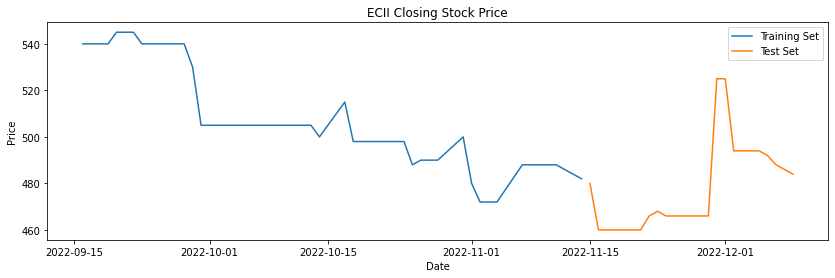

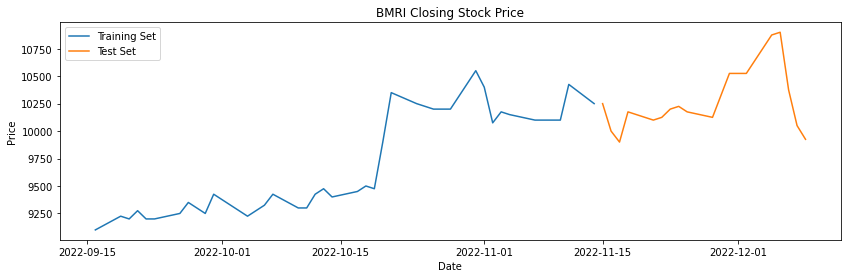

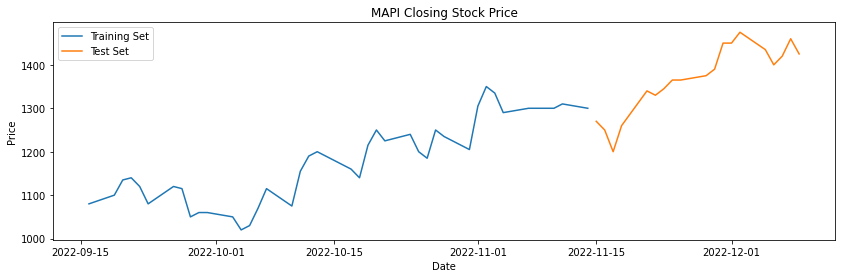

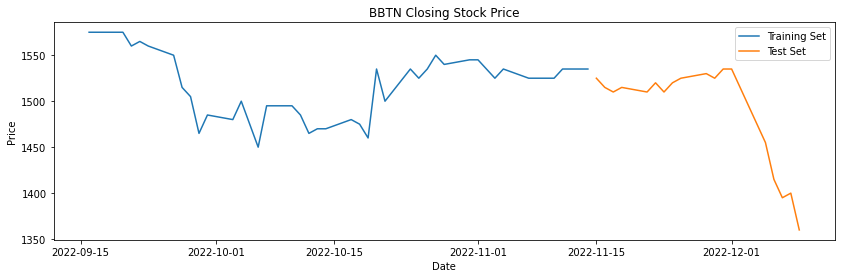

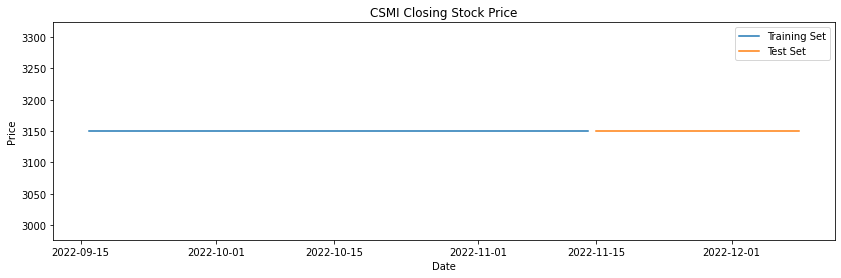

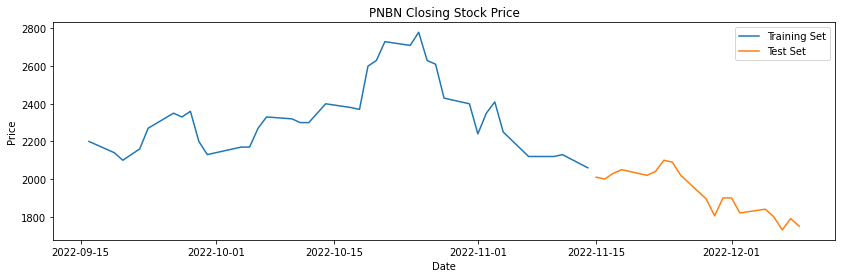

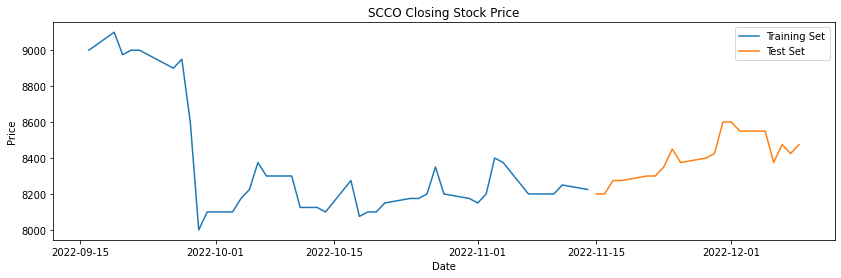

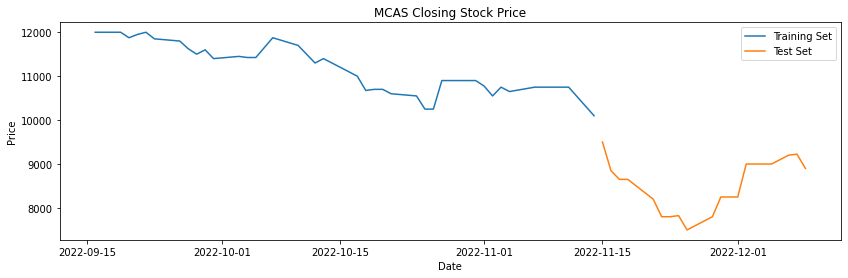

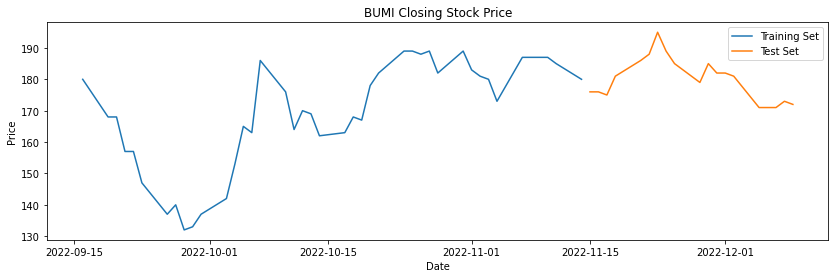

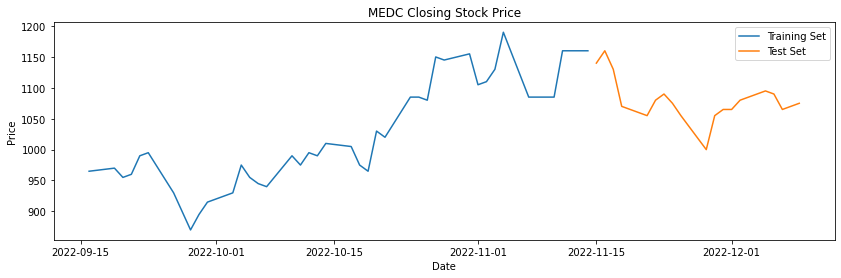

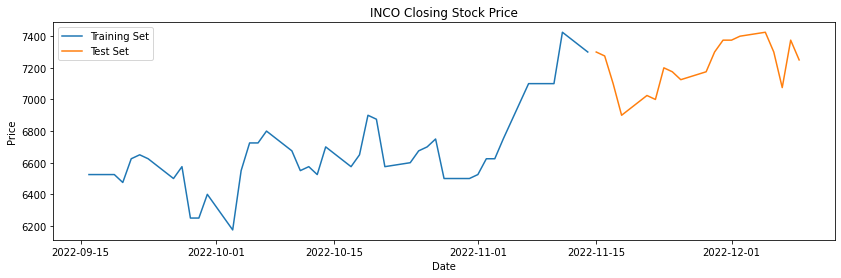

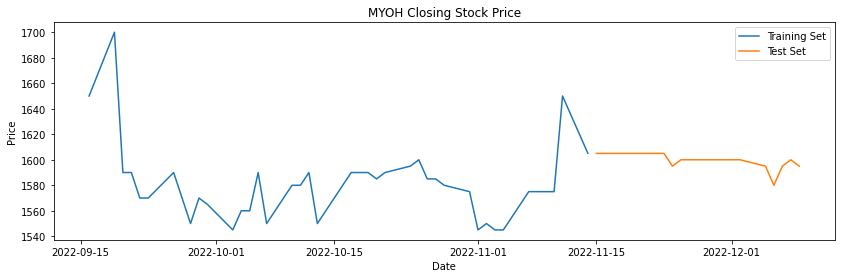

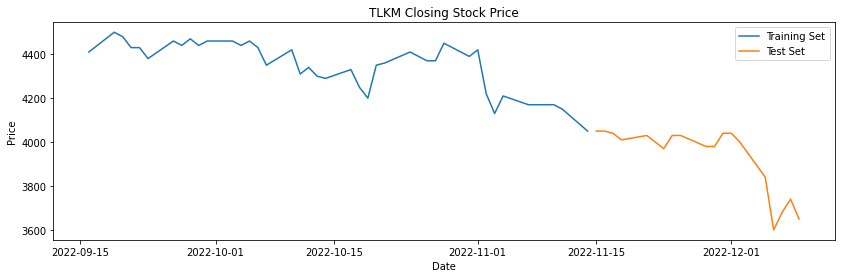

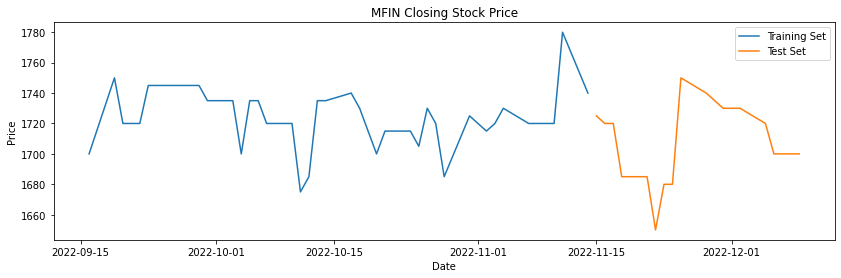

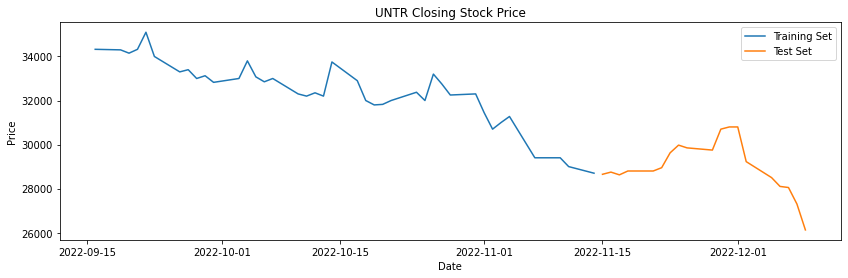

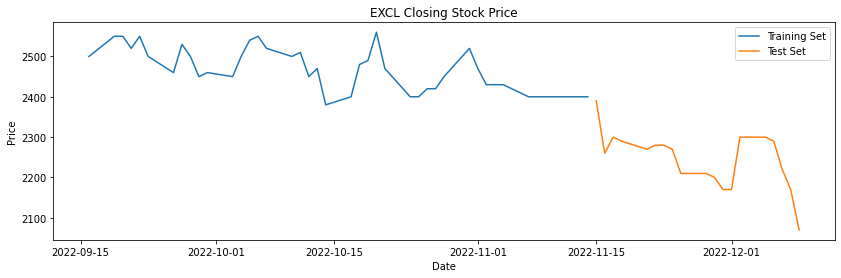

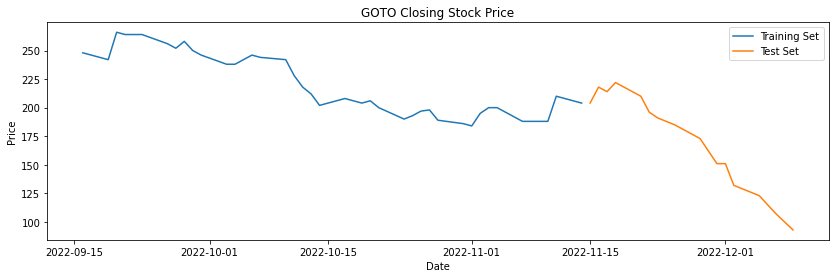

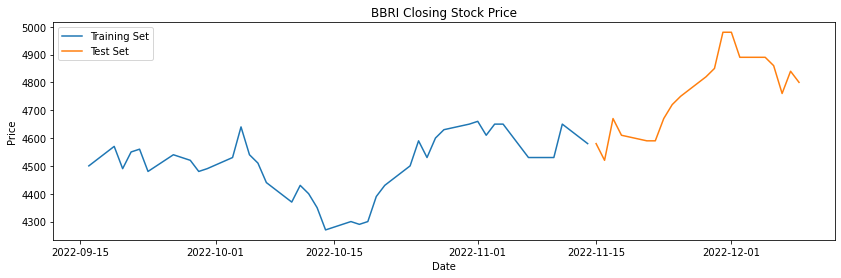

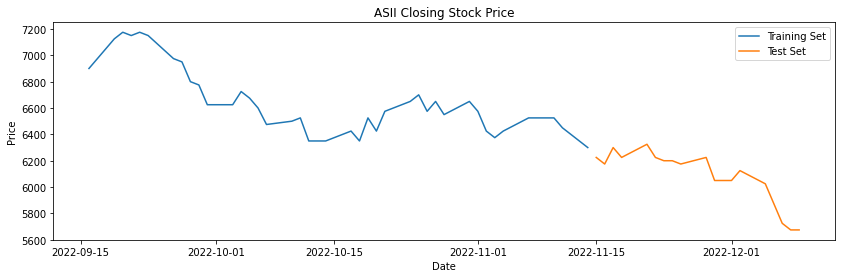

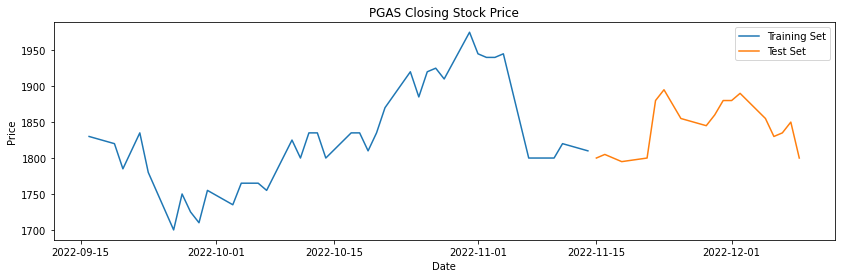

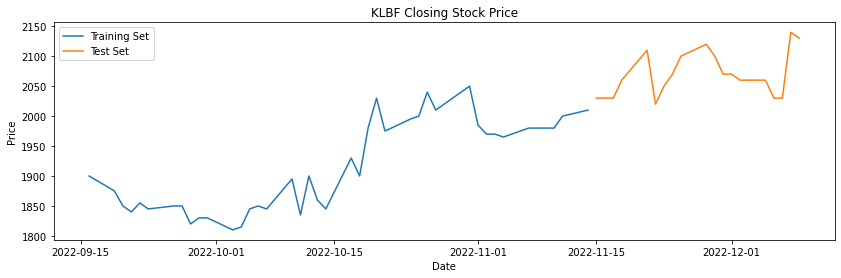

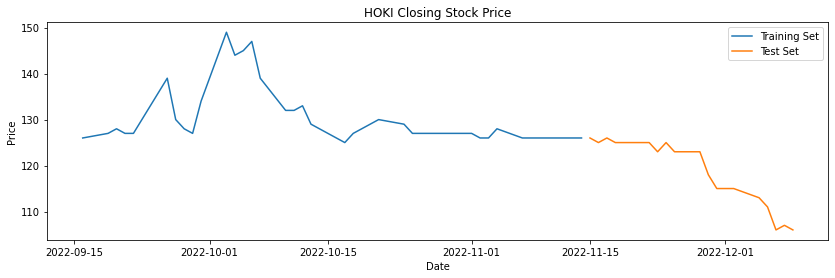

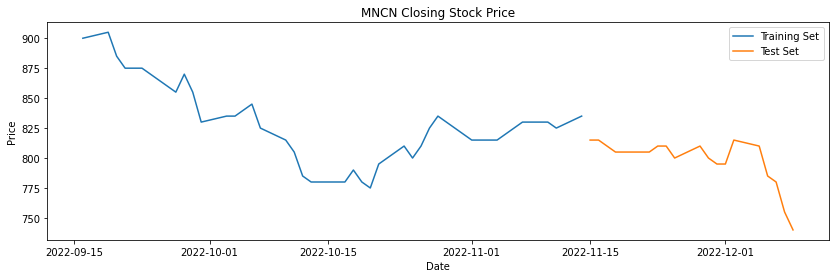

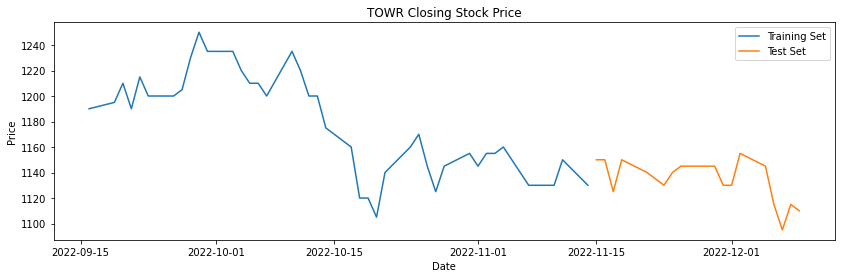

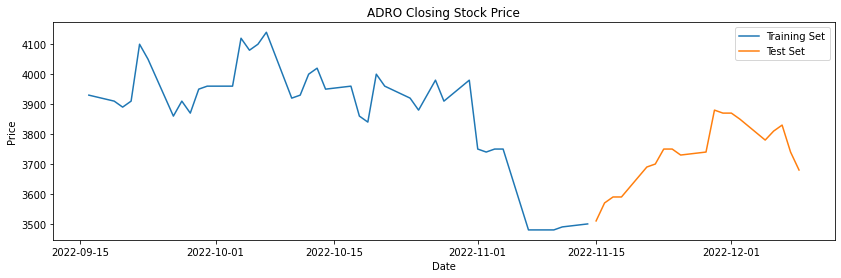

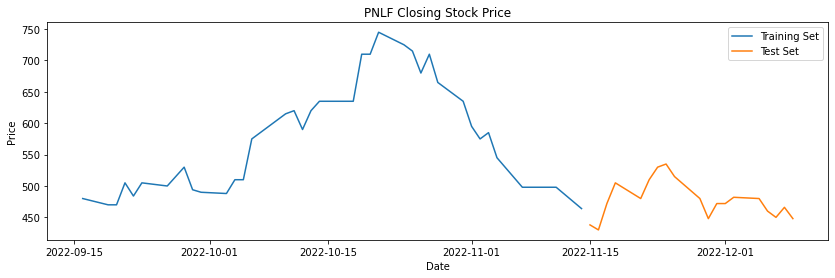

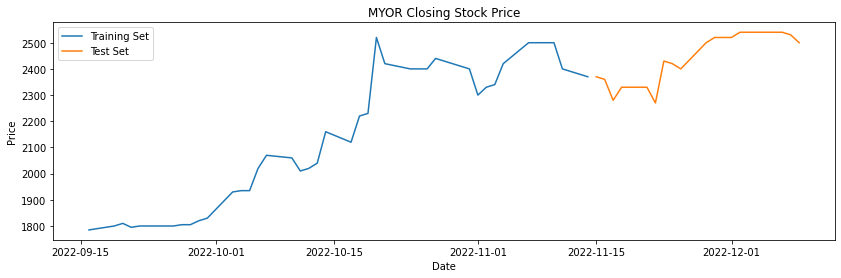

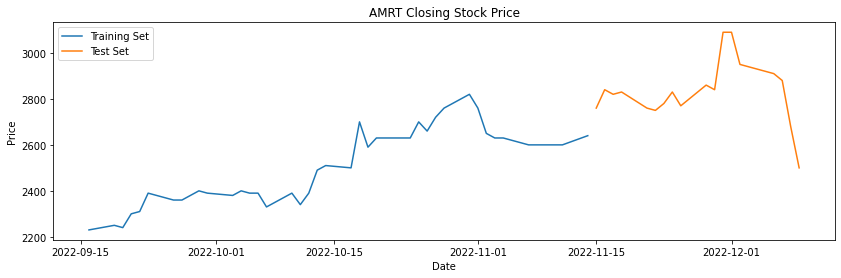

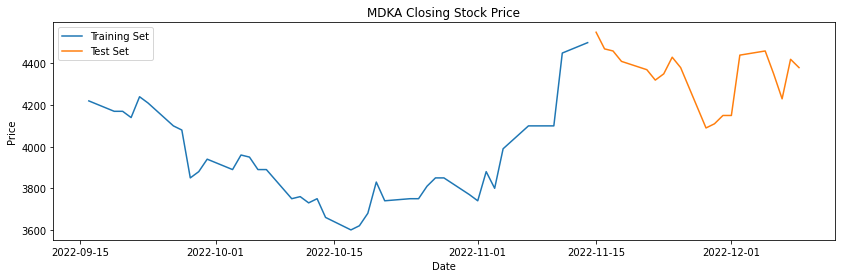

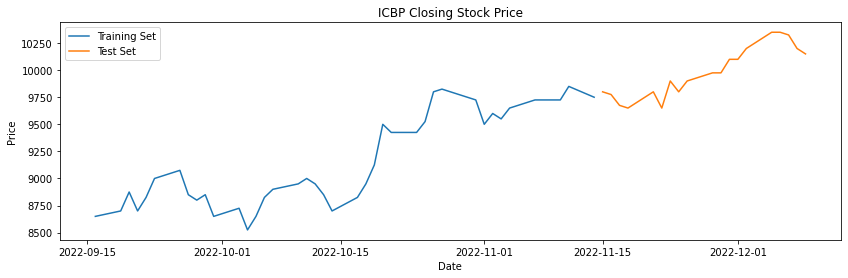

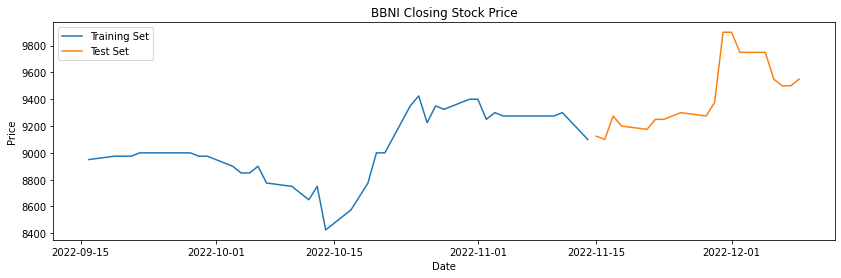

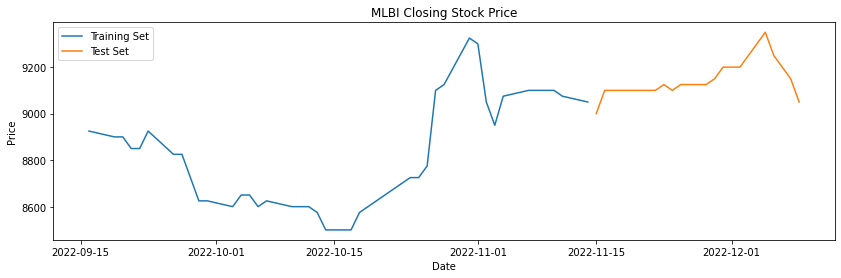

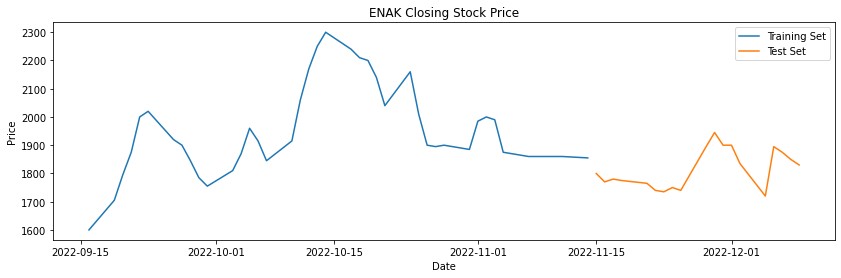

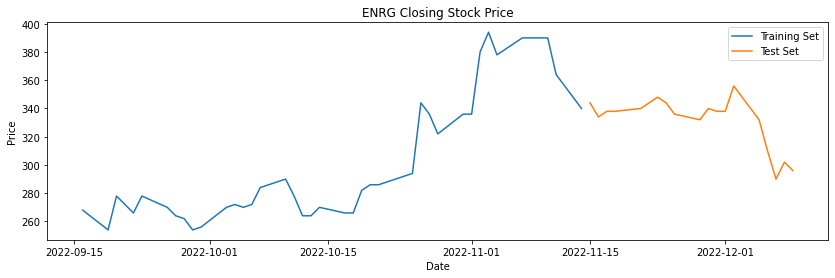

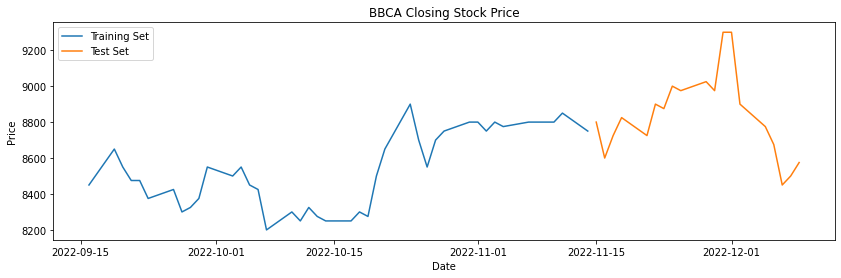

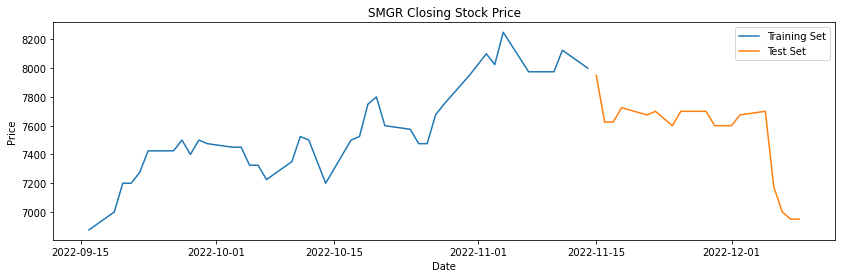

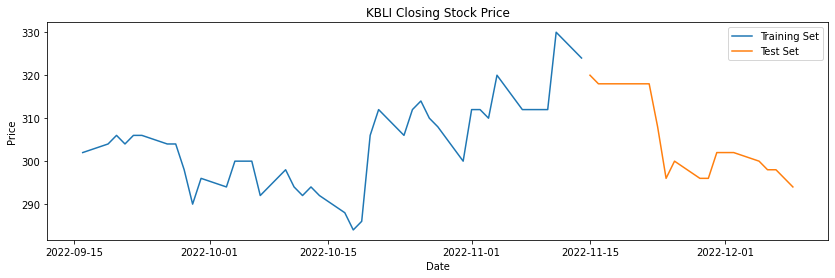

In [37]:
for i in datasets:
    plt.figure(figsize=(14,4))
    plt.plot(data_new[i]["train"])
    plt.plot(data_new[i]["test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

In [336]:
#Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(datasets):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_new[i]["train"])
    a1 = np.array(data_new[i]["test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.transform(a1)
    scaler[i] = sc
    
del a0
del a1

In [40]:
trainset = {}
testset = {}
for j in datasets:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(1, 42):
        X_train.append(transform_train[j][i-1:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(1, 19):
        X_test.append(transform_test[j][i-1:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [41]:
arr_buff = []
for i in datasets:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=datasets)

X_train y_train      X_test y_test
ECII  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
BMRI  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
MAPI  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
BBTN  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
CSMI  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
PNBN  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
SCCO  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
MCAS  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
BUMI  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
MEDC  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
INCO  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
MYOH  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
TLKM  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
MFIN  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
UNTR  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
EXCL  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
GOTO  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
BBRI  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
ASII  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
PGAS  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
KLBF  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
HOKI  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
MNCN  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
TOWR  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
ADRO  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
PNLF  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
MYOR  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
AMRT  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
MDKA  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
ICBP  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
BBNI  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
MLBI  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
ENAK  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
ENRG  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
BBCA  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
SMGR  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)
KBLI  (41, 1, 1)   (41,)  (18, 1, 1)  (18,)

# Models

In [42]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_mae') is not None and logs.get('val_mae') < 0.015:
      self.model.stop_training = True

earlystop = EarlyStopping(monitor='val_mae', patience=64)

In [43]:
%%time
# The LSTM architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the RNN
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              metrics=["mae"], 
              loss=tf.keras.losses.Huber())

#Training Models
history = {}
for i in datasets:
    print("Train to", i)
    history[i] = model.fit(trainset[i]["X"], 
              trainset[i]["y"], 
              epochs=500, 
              batch_size=8,
              validation_data=(testset[i]['X'], testset[i]['y']), 
              shuffle=False,
              callbacks=[Callback(), earlystop])

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 59ms/step - loss: 0.0114 - mae: 0.1034 - val_loss: 0.0118 - val_mae: 0.1365
Epoch 123/500
2/2 [==============================] - 0s 48ms/step - loss: 0.0091 - mae: 0.1011 - val_loss: 0.0118 - val_mae: 0.1364
Epoch 124/500
2/2 [==============================] - 0s 60ms/step - loss: 0.0088 - mae: 0.1042 - val_loss: 0.0118 - val_mae: 0.1364
Epoch 125/500
2/2 [==============================] - 0s 59ms/step - loss: 0.0106 - mae: 0.1101 - val_loss: 0.0118 - val_mae: 0.1363
Epoch 126/500
2/2 [==============================] - 0s 60ms/step - loss: 0.0069 - mae: 0.0901 - val_loss: 0.0118 - val_mae: 0.1362
Epoch 127/500
2/2 [==============================] - 0s 43ms/step - loss: 0.0093 - mae: 0.1005 - val_loss: 0.0118 - val_mae: 0.1362
Epoch 128/500
2/2 [==============================] - 0s 38ms/step - loss: 0.0086 - mae: 0.1001 - val_loss: 0.0118 - val_mae: 0.1362
Epoch 129/500
2/2 [====================

1/1 [==============================] - 0s 29ms/step


<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))


1/1 [==============================] - 0s 35ms/step


<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))


1/1 [==============================] - 0s 27ms/step


<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))


1/1 [==============================] - 0s 30ms/step


<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))


1/1 [==============================] - 0s 28ms/step


<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))


1/1 [==============================] - 0s 28ms/step


<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))


1/1 [==============================] - 0s 25ms/step


<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))


1/1 [==============================] - 0s 28ms/step


<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-44-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6)

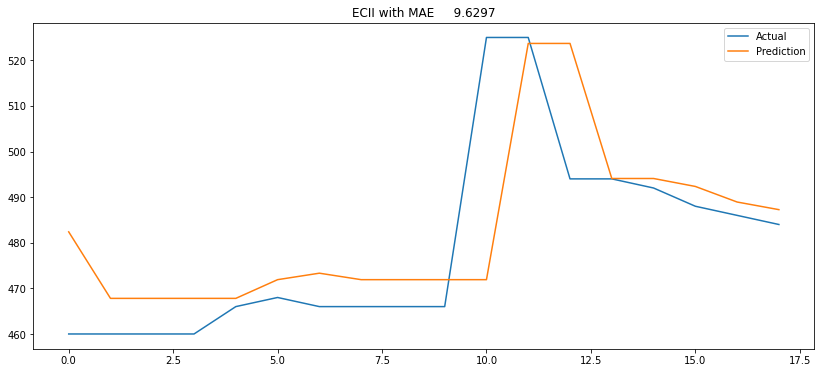

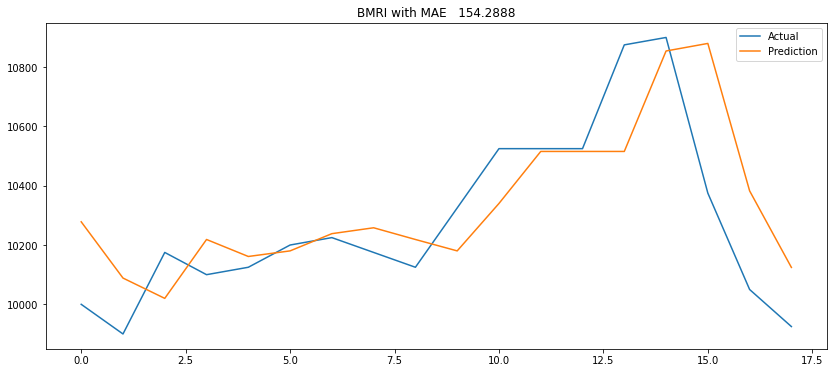

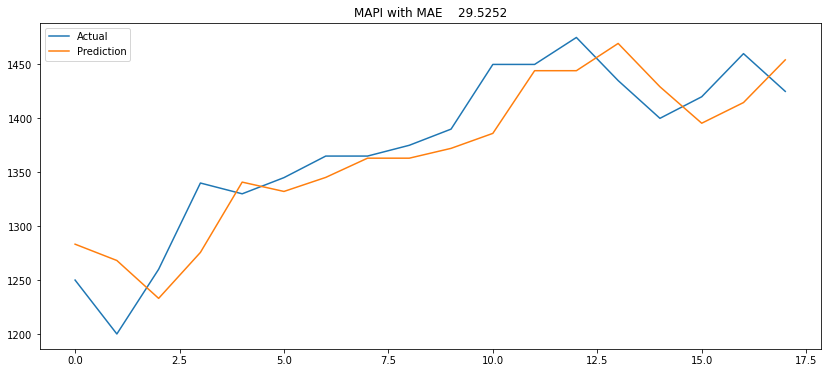

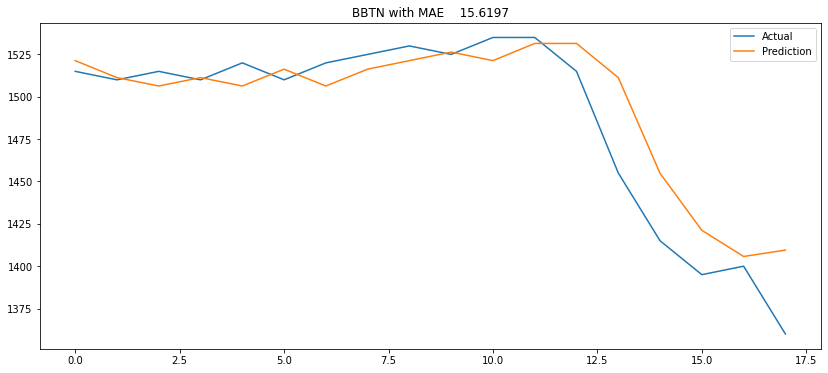

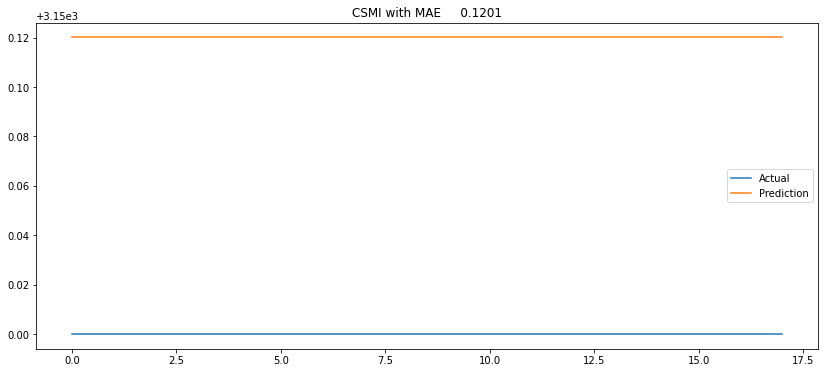

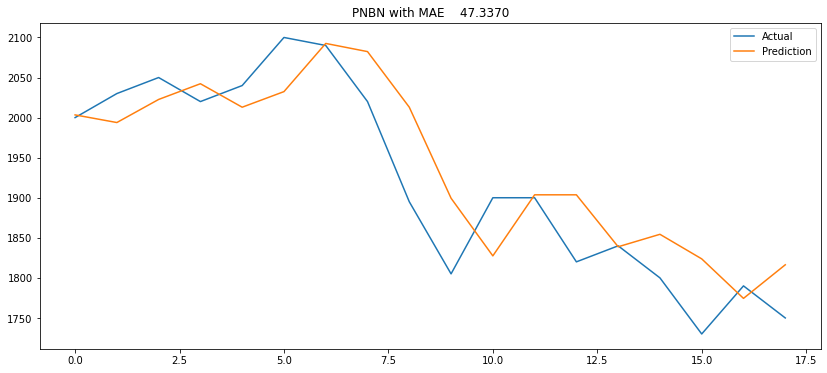

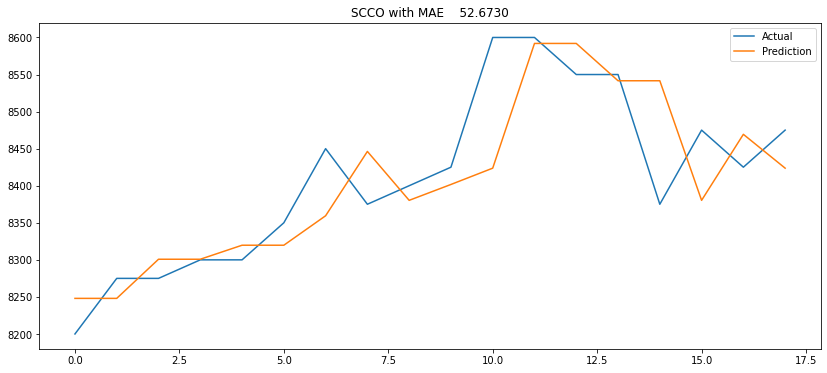

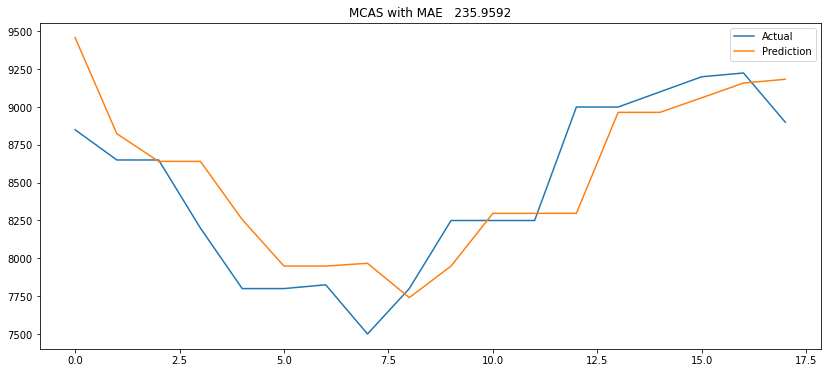

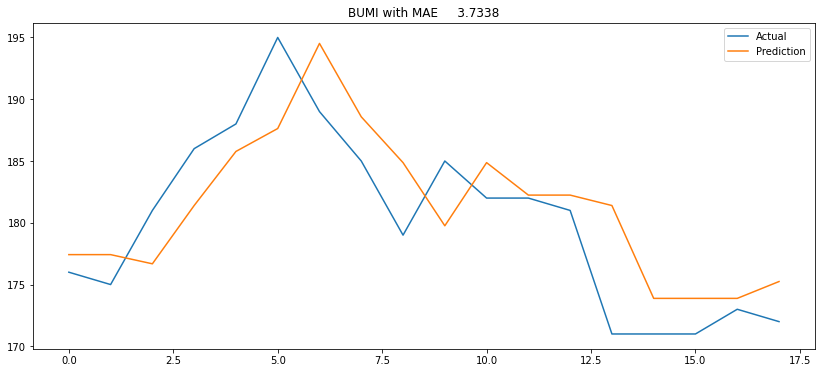

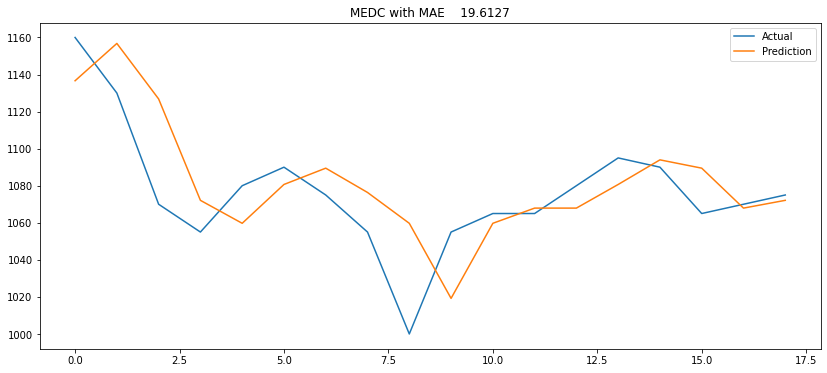

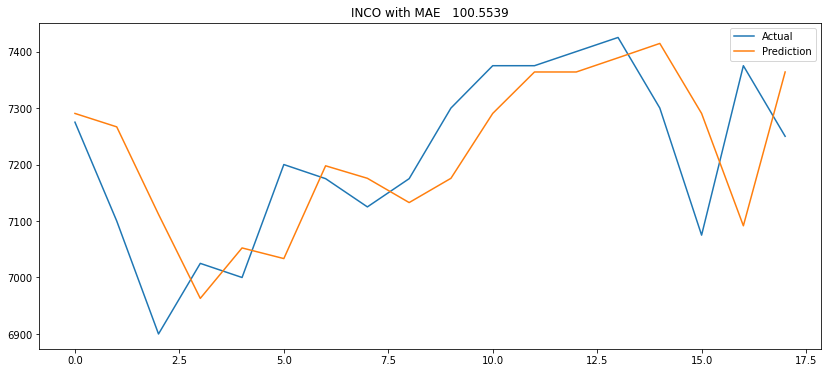

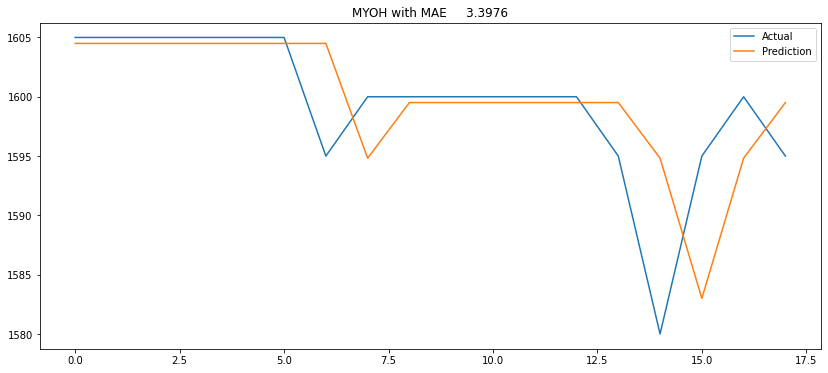

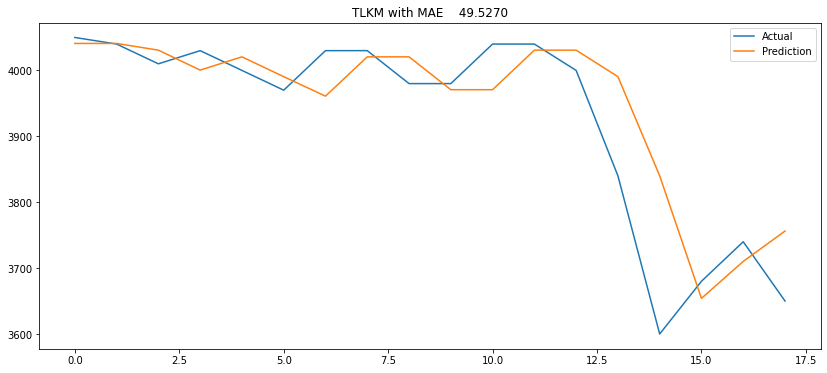

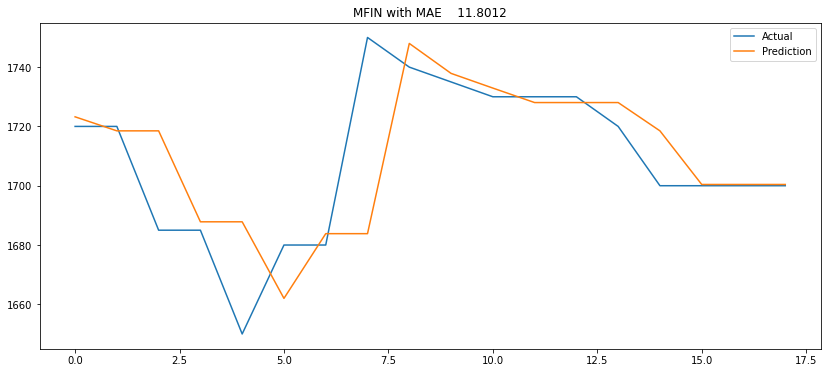

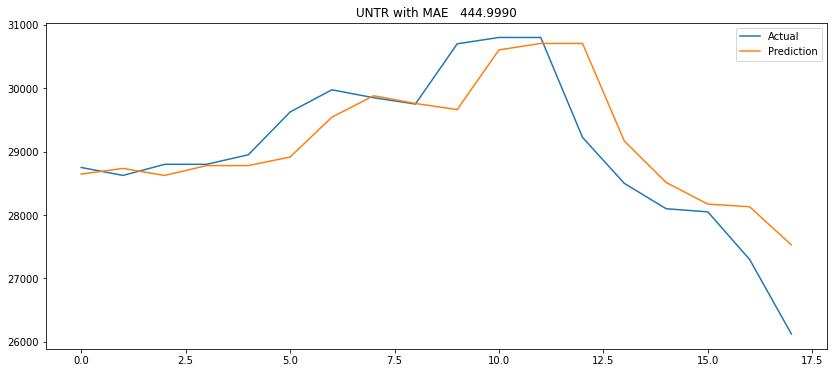

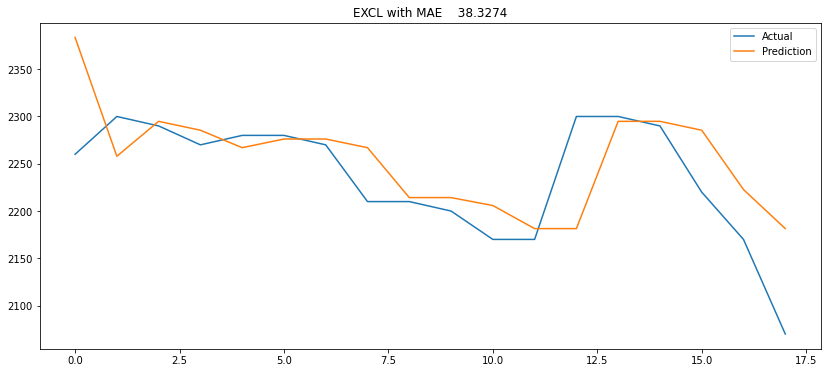

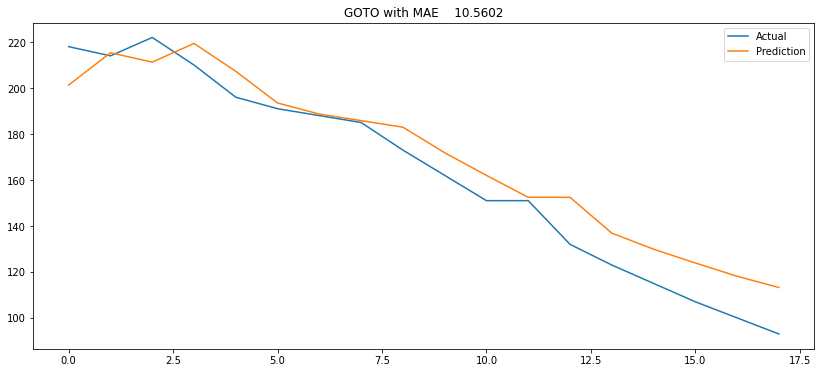

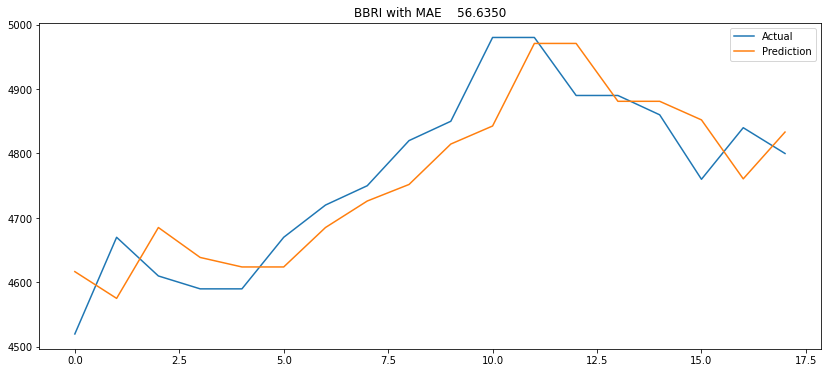

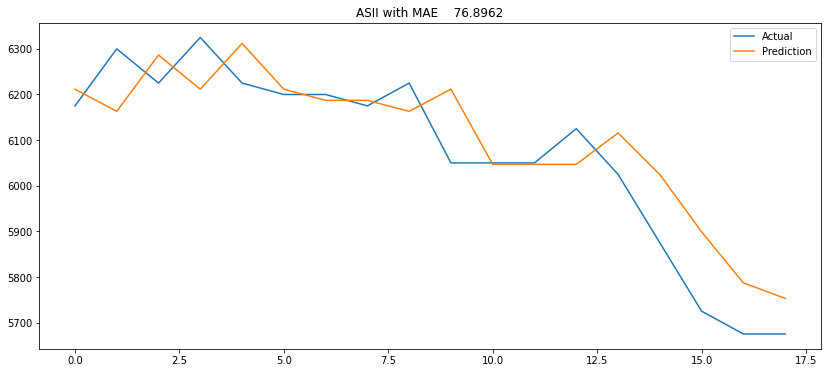

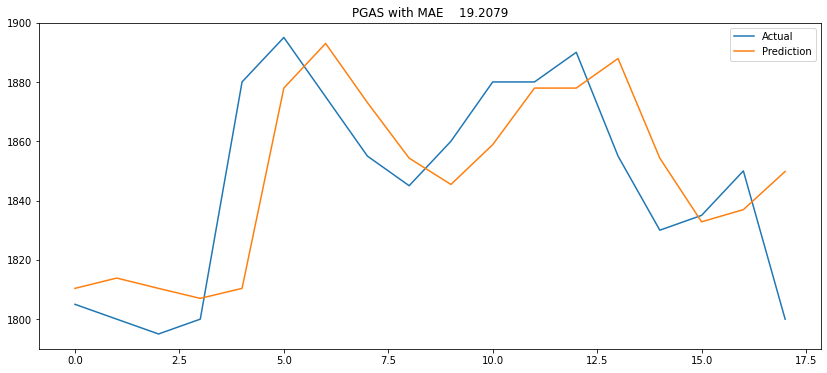

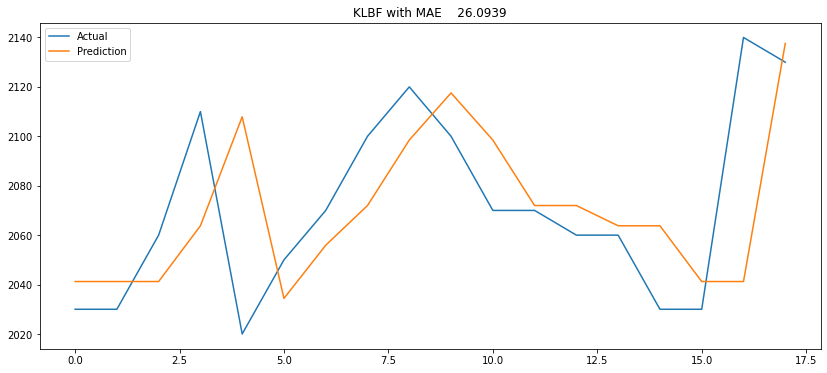

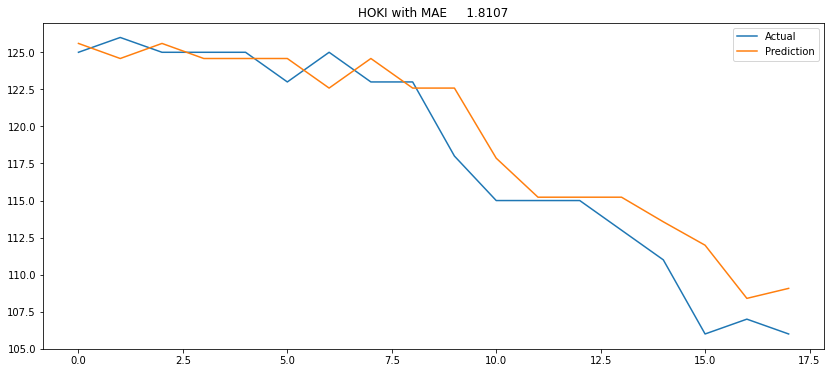

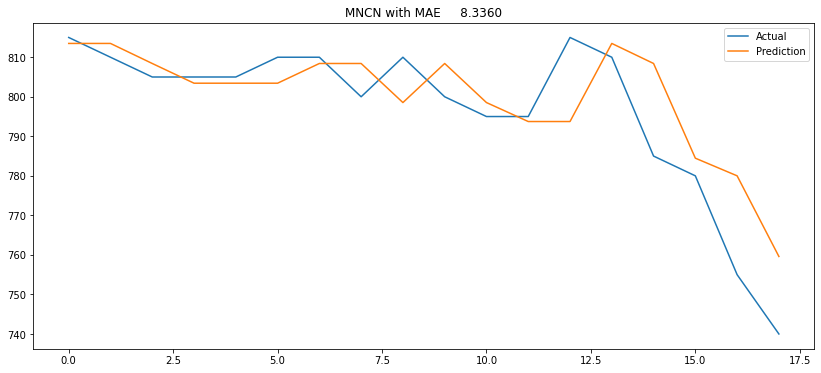

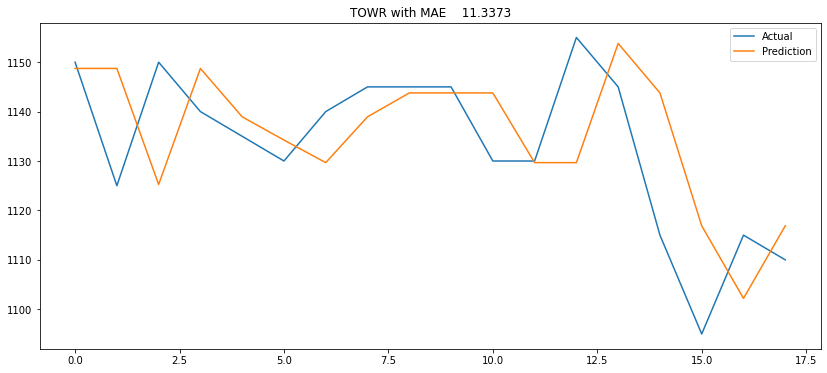

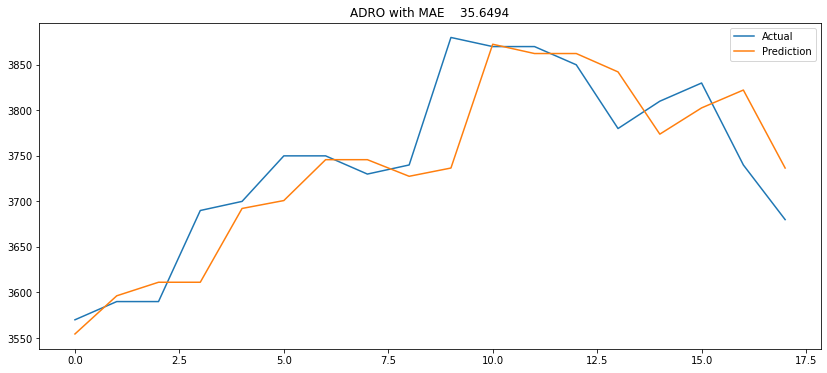

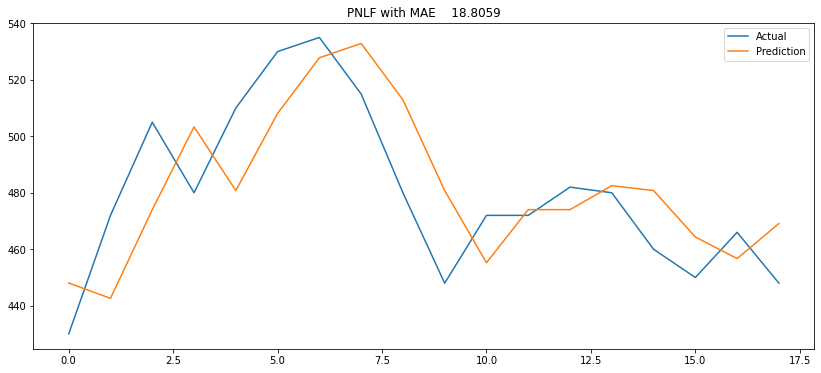

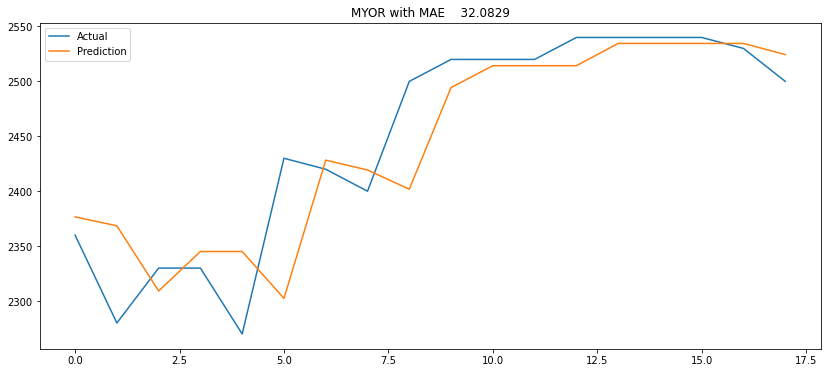

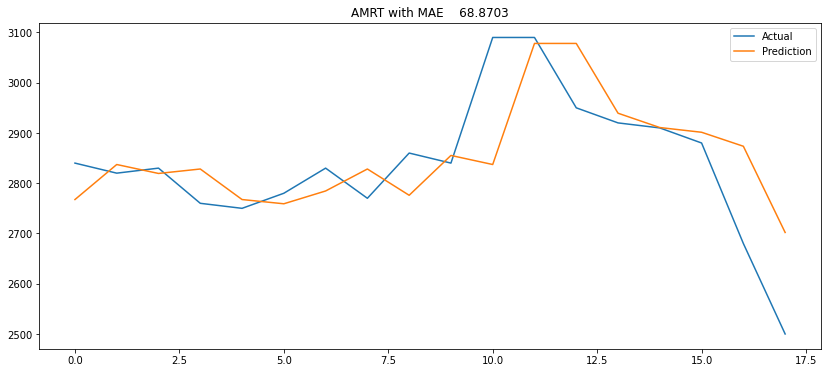

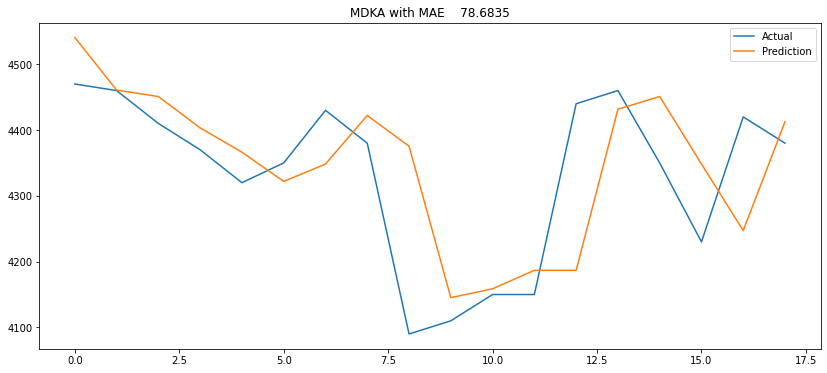

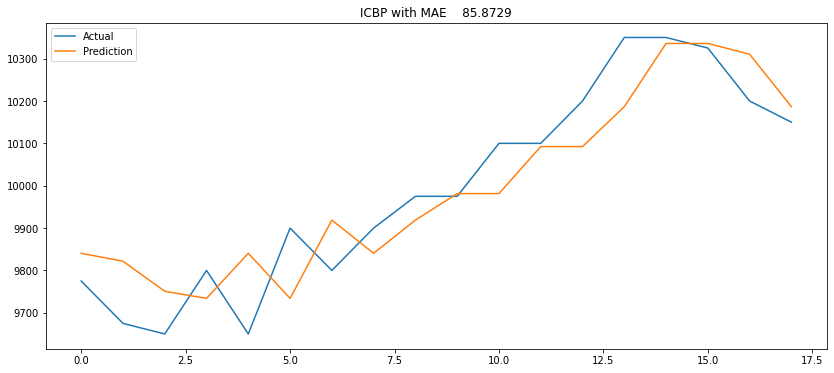

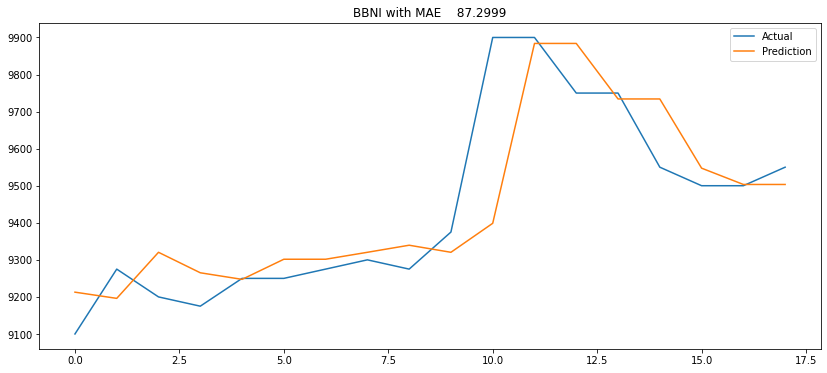

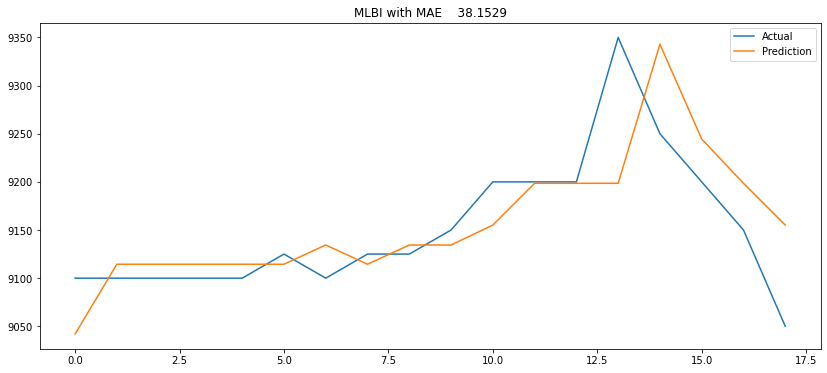

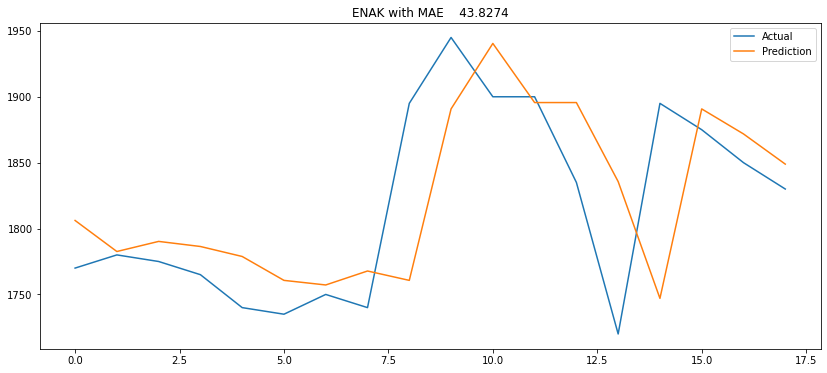

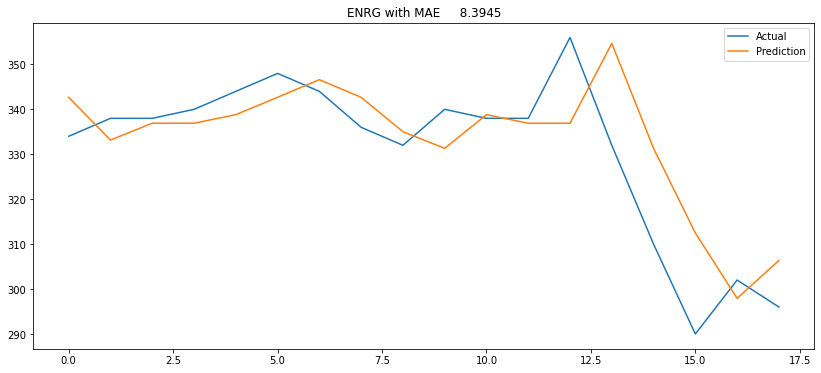

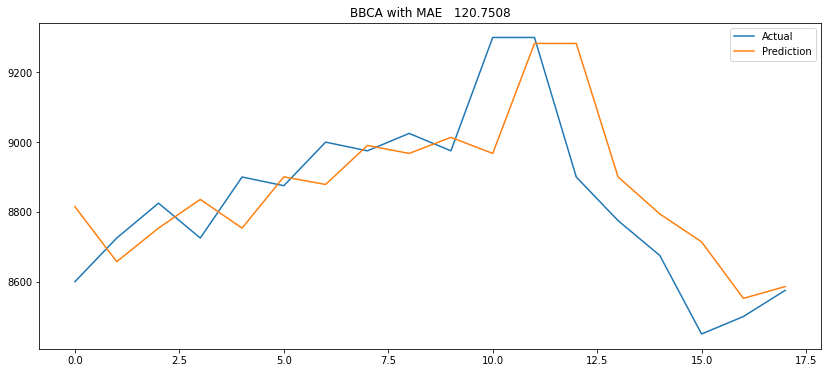

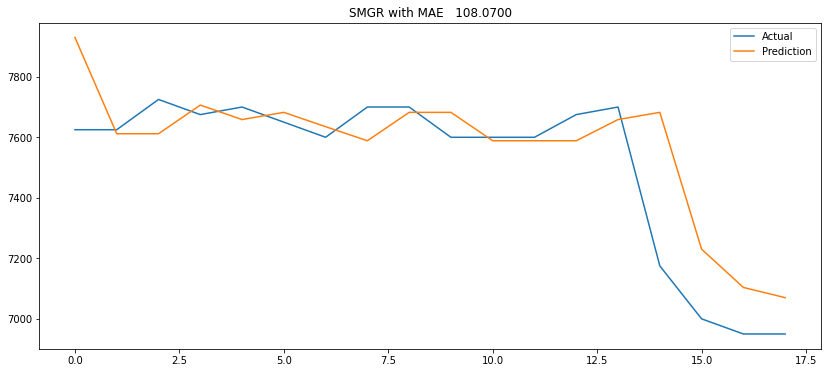

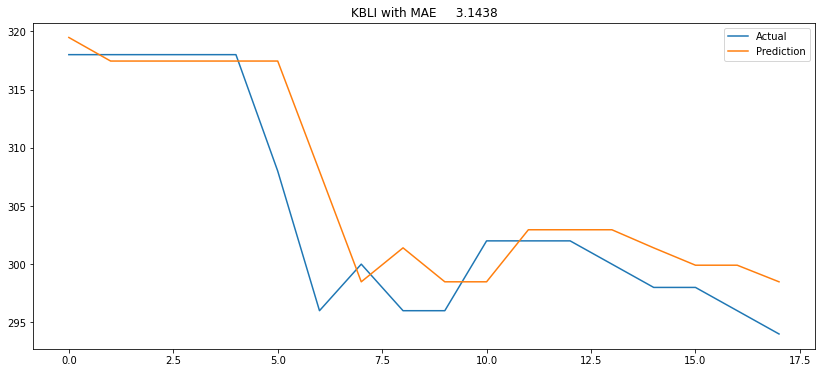

In [44]:
pred_result = {}
for i in datasets:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
    MAE = mean_absolute_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MAE {:10.4f}".format(i, MAE))
    plt.plot(y_true)
    plt.plot(y_pred)
    plt.legend(labels=['Actual', 'Prediction'])
    plt.show

ECII - Loss & MAE


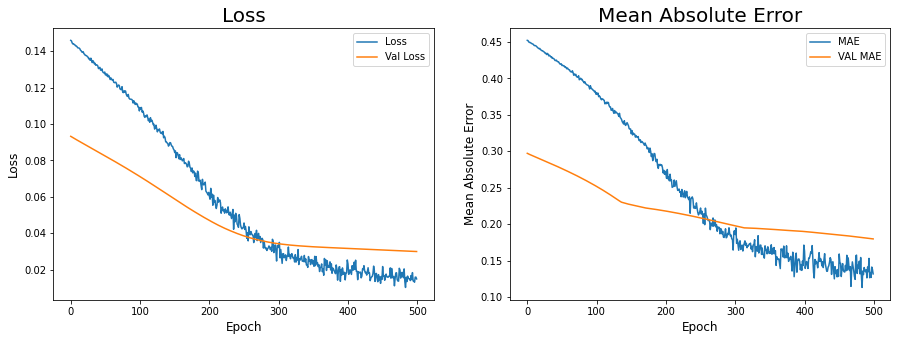

BMRI - Loss & MAE


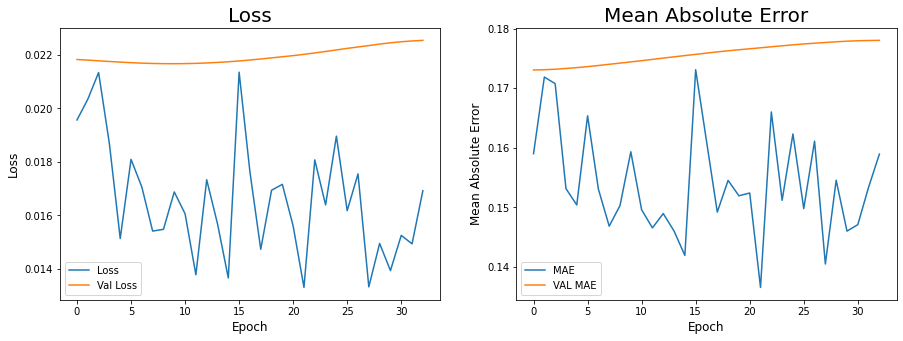

MAPI - Loss & MAE


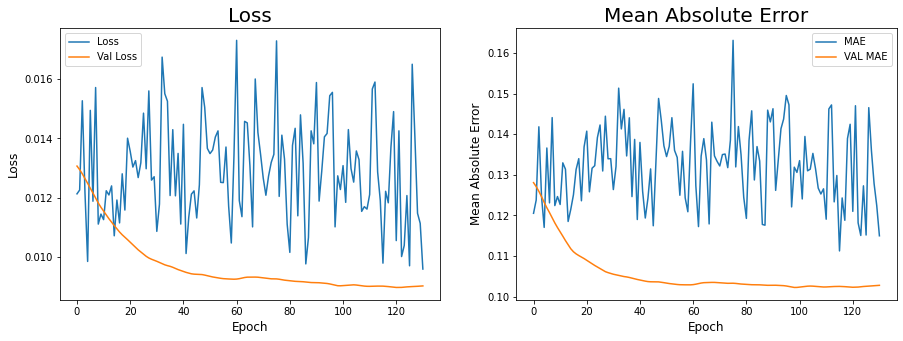

BBTN - Loss & MAE


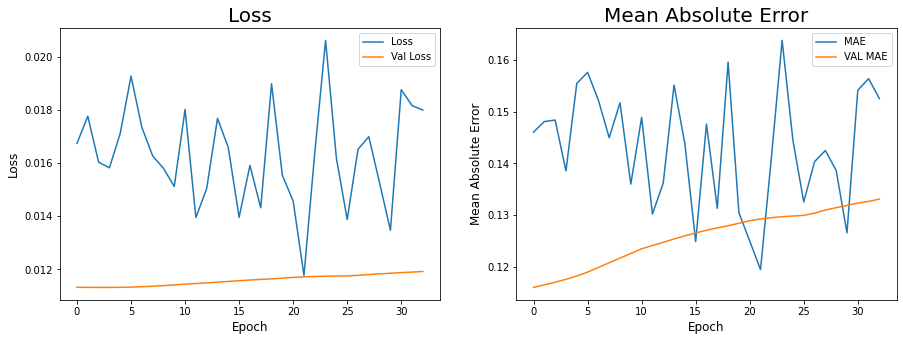

CSMI - Loss & MAE


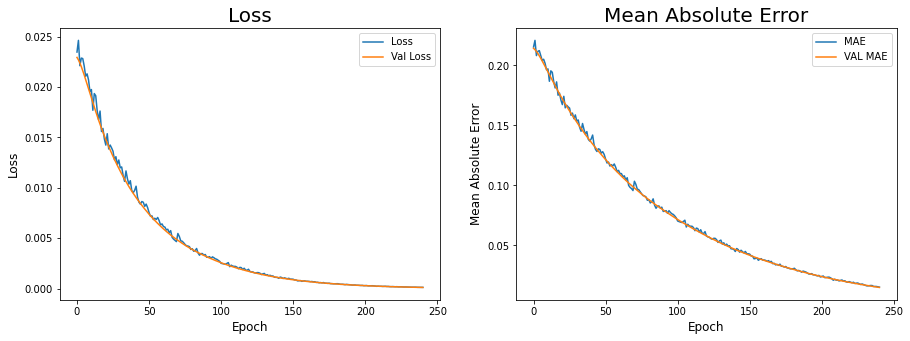

PNBN - Loss & MAE


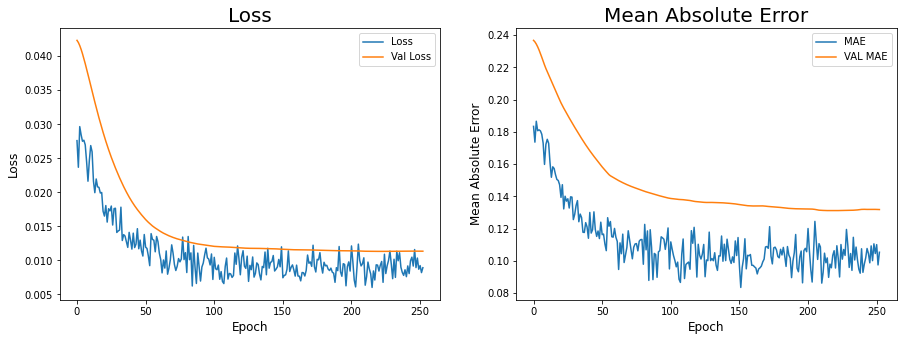

SCCO - Loss & MAE


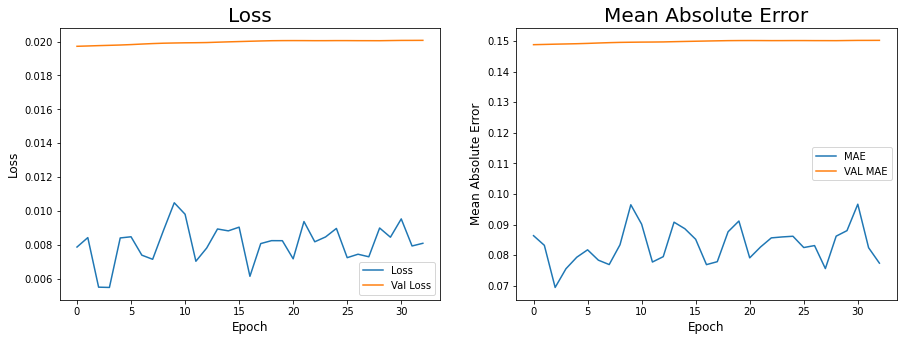

MCAS - Loss & MAE


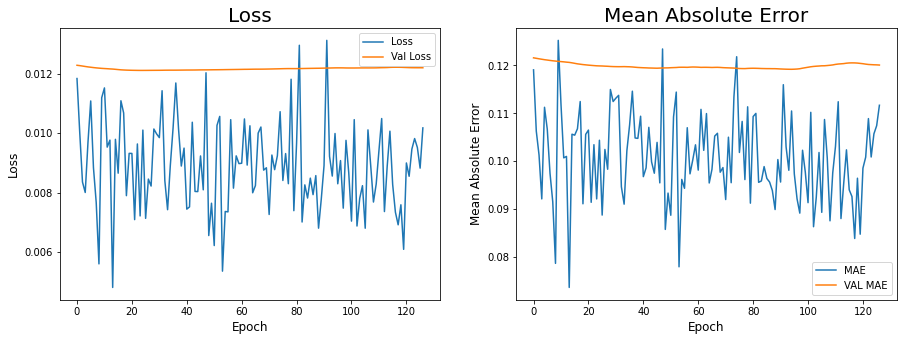

BUMI - Loss & MAE


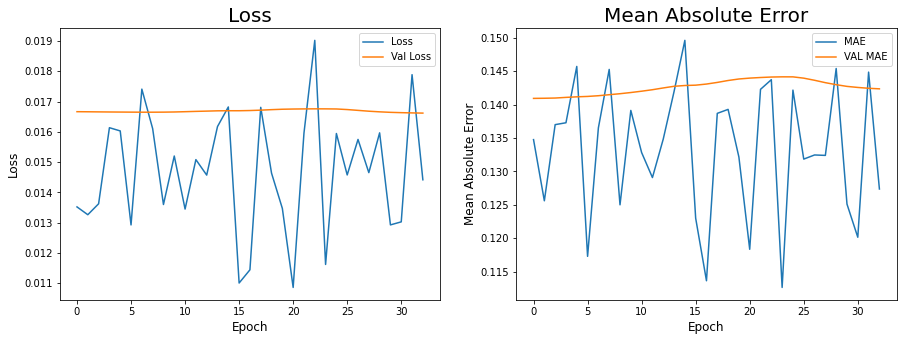

MEDC - Loss & MAE


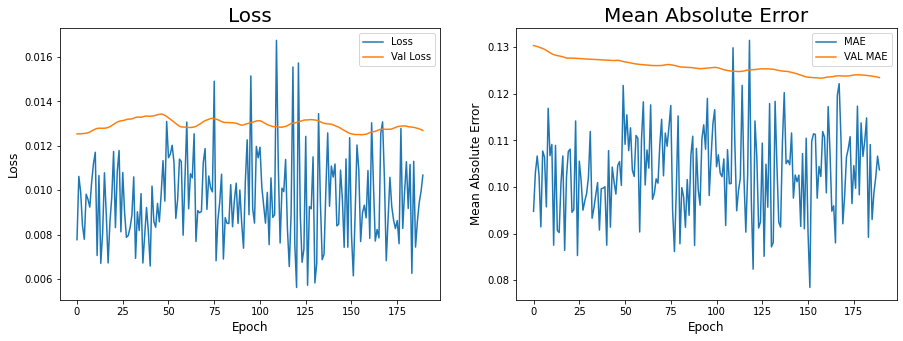

INCO - Loss & MAE


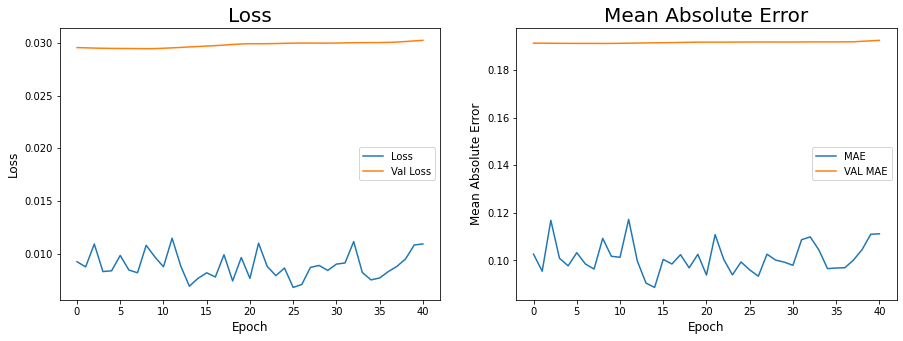

MYOH - Loss & MAE


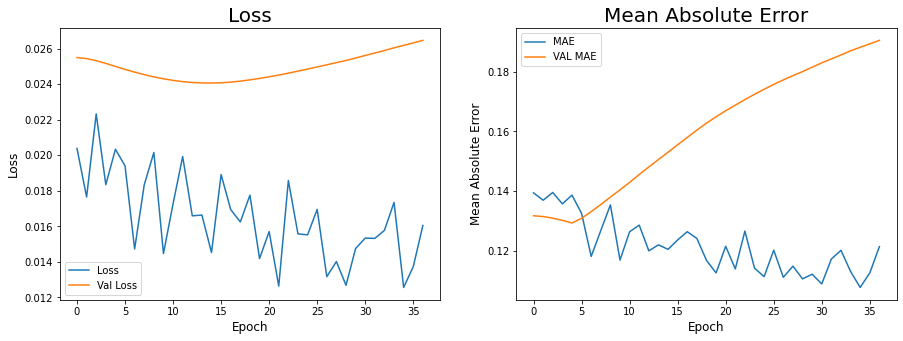

TLKM - Loss & MAE


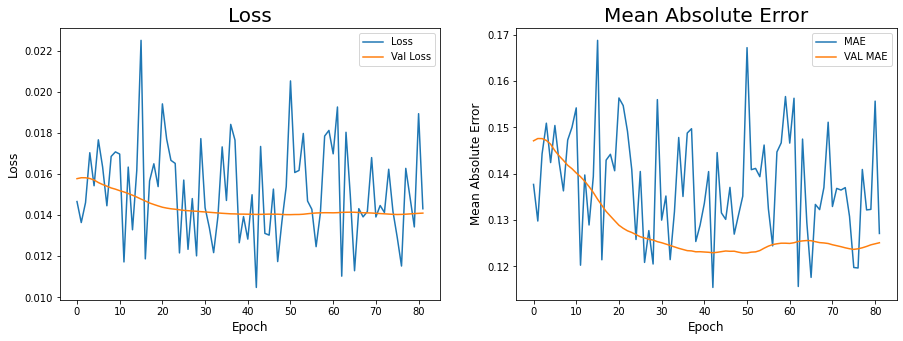

MFIN - Loss & MAE


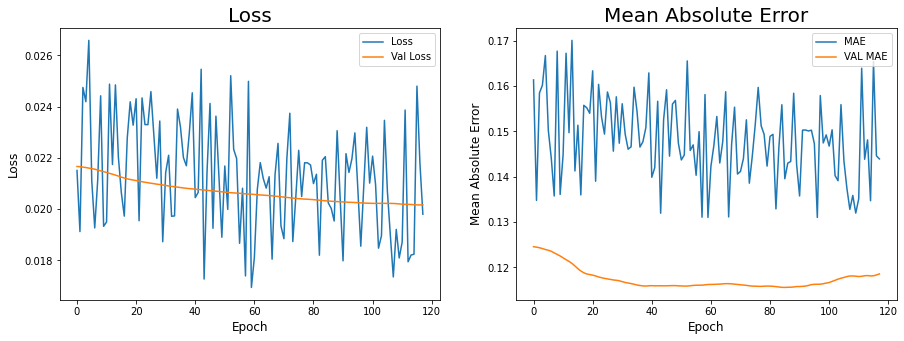

UNTR - Loss & MAE


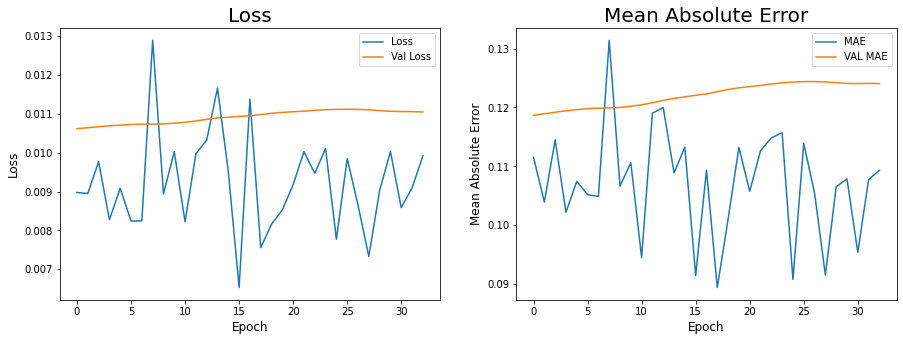

EXCL - Loss & MAE


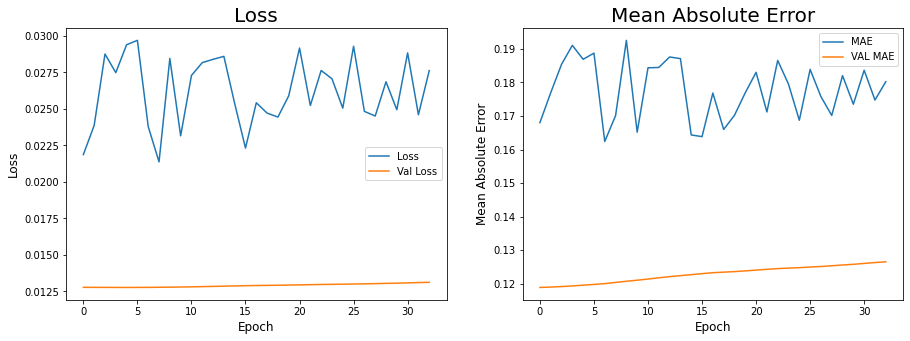

GOTO - Loss & MAE


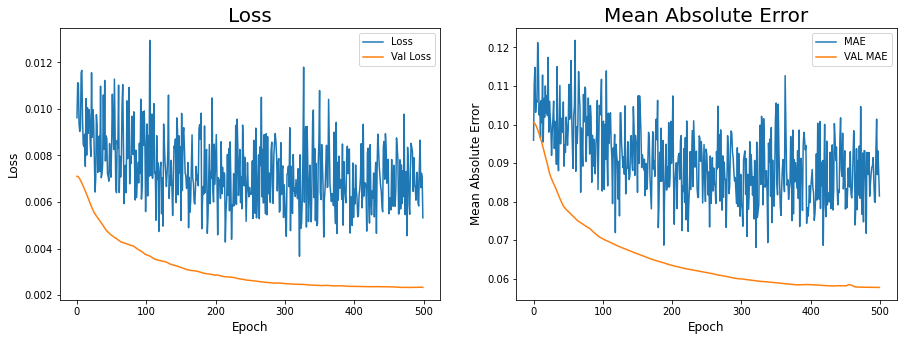

BBRI - Loss & MAE


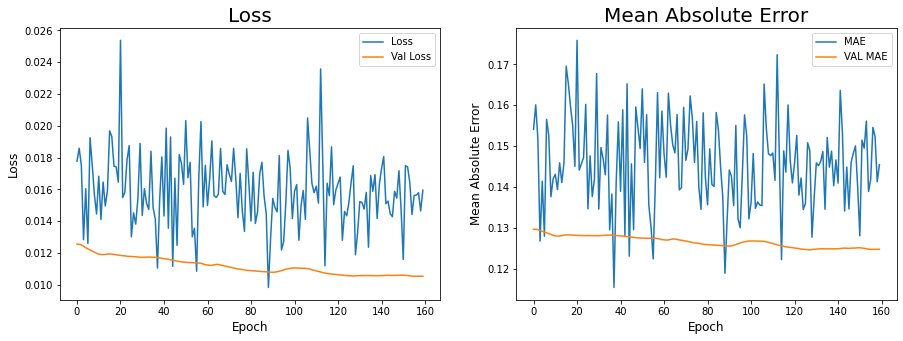

ASII - Loss & MAE


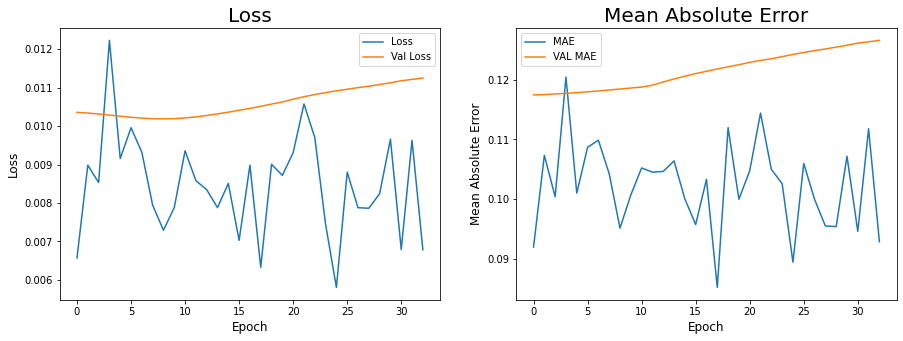

PGAS - Loss & MAE


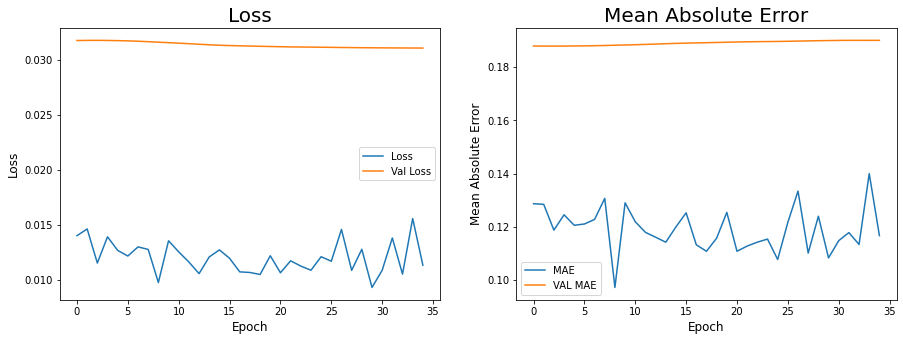

KLBF - Loss & MAE


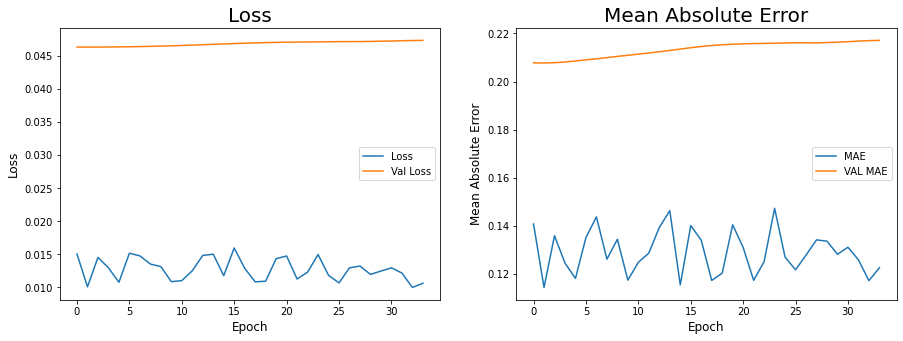

HOKI - Loss & MAE


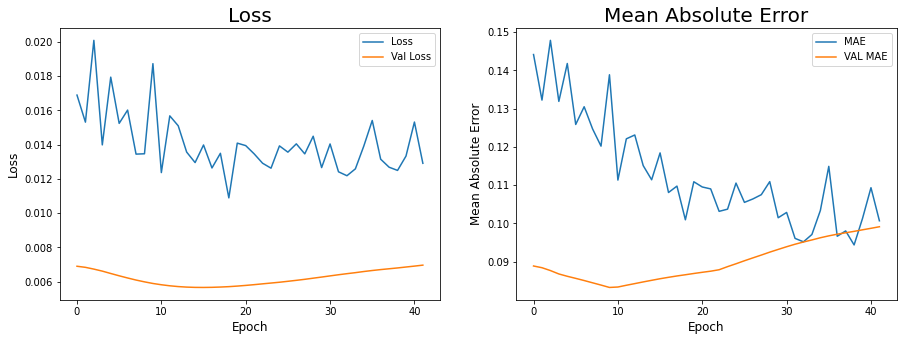

MNCN - Loss & MAE


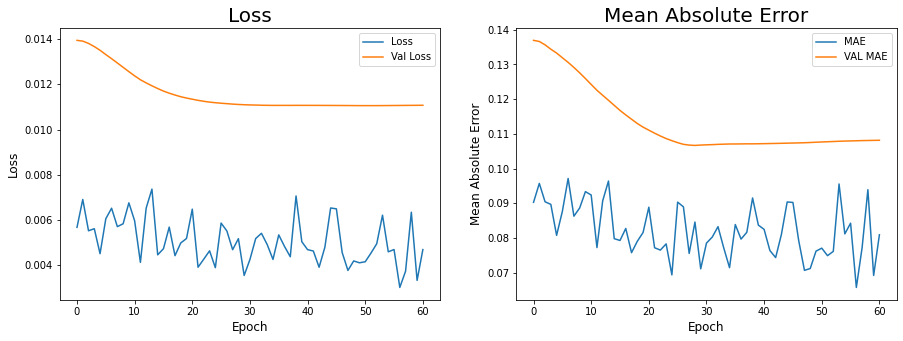

TOWR - Loss & MAE


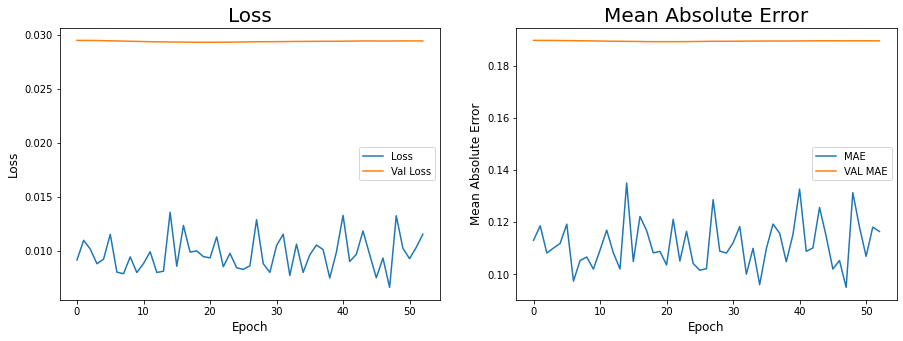

ADRO - Loss & MAE


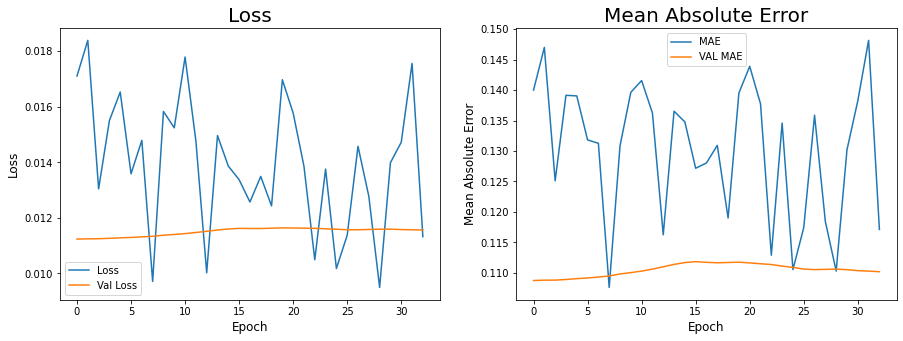

PNLF - Loss & MAE


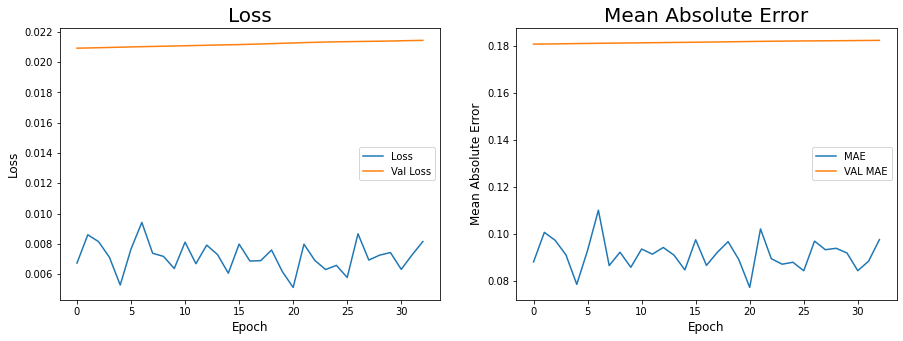

MYOR - Loss & MAE


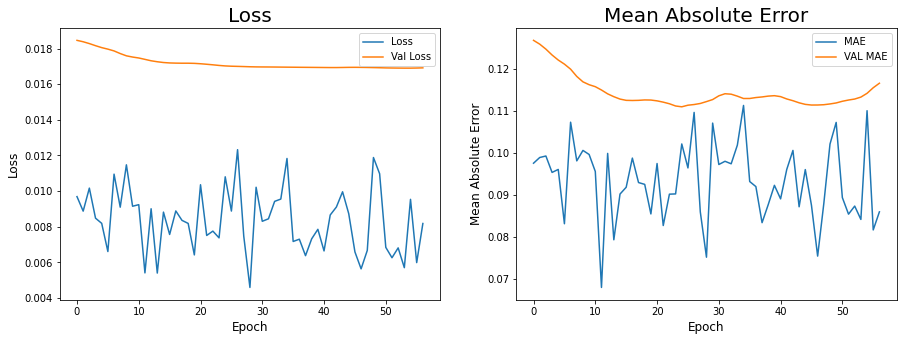

AMRT - Loss & MAE


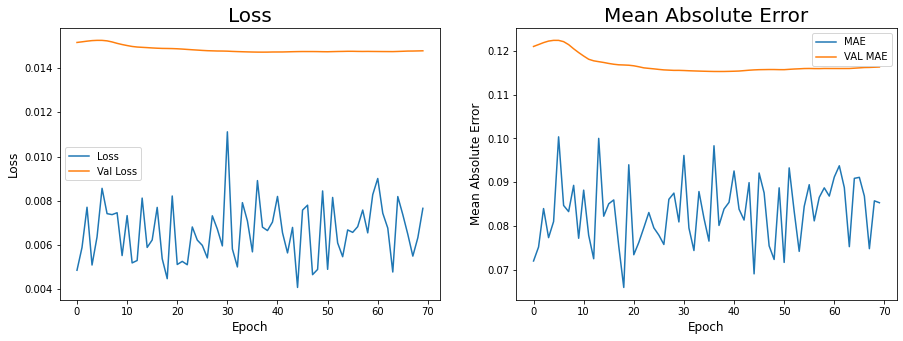

MDKA - Loss & MAE


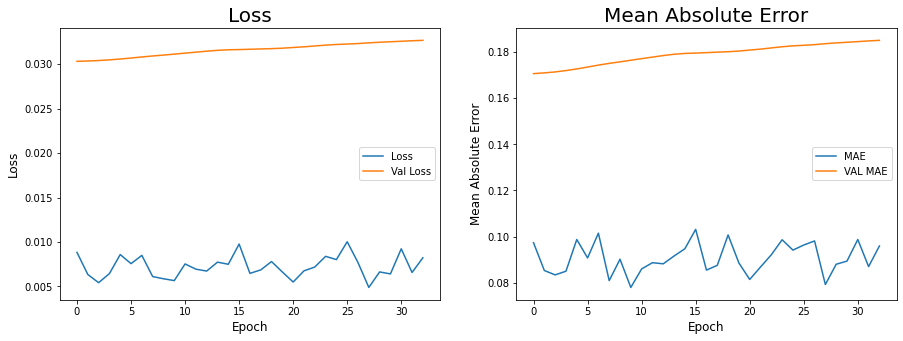

ICBP - Loss & MAE


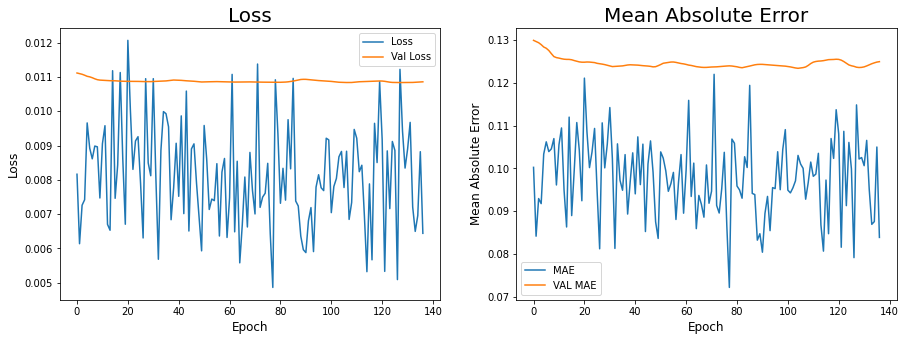

BBNI - Loss & MAE


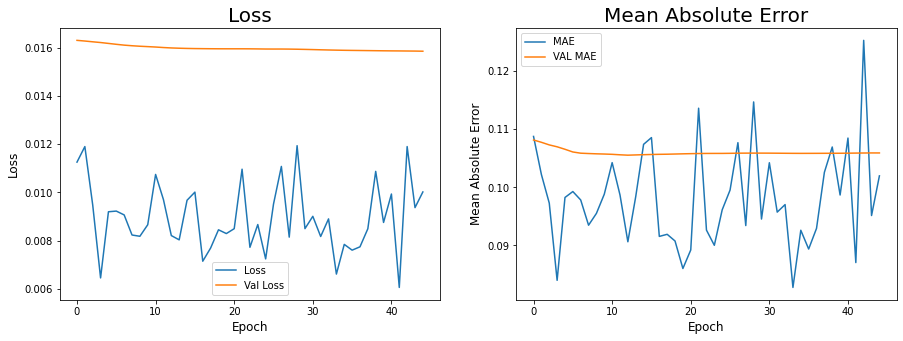

MLBI - Loss & MAE


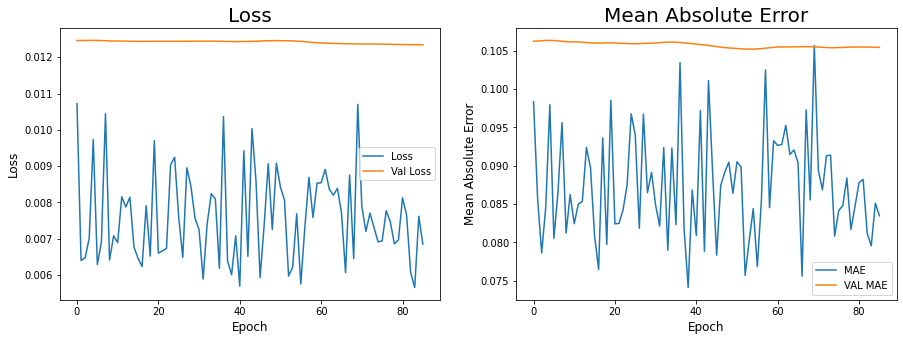

ENAK - Loss & MAE


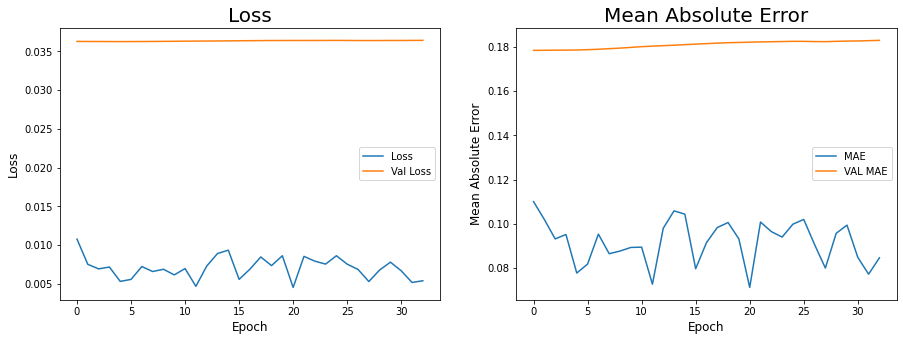

ENRG - Loss & MAE


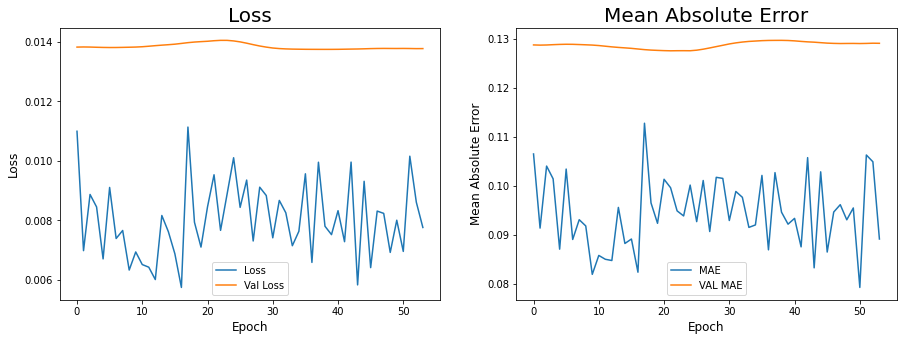

BBCA - Loss & MAE


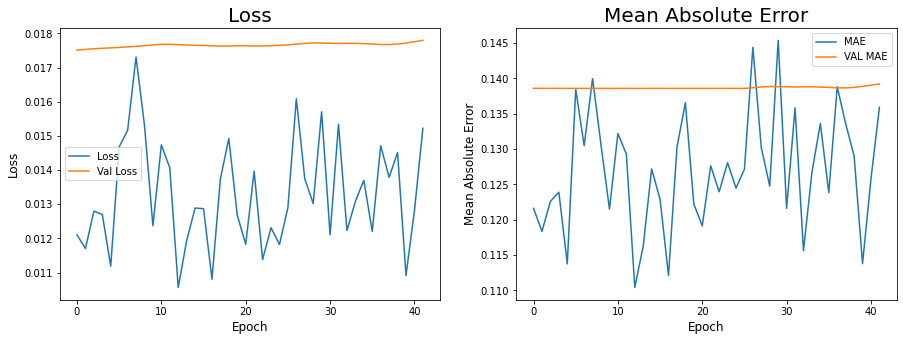

SMGR - Loss & MAE


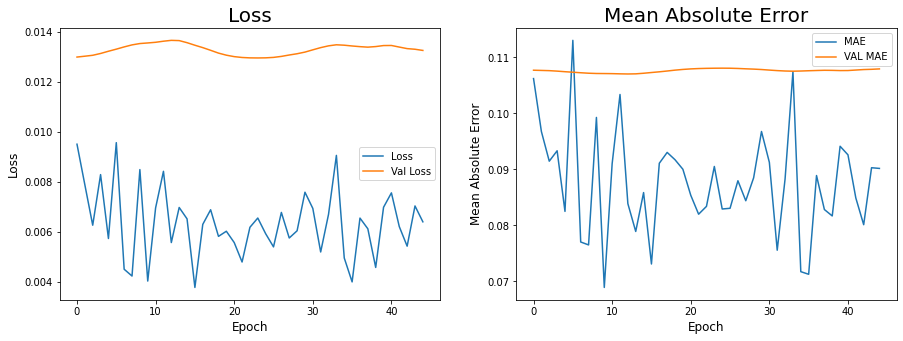

KBLI - Loss & MAE


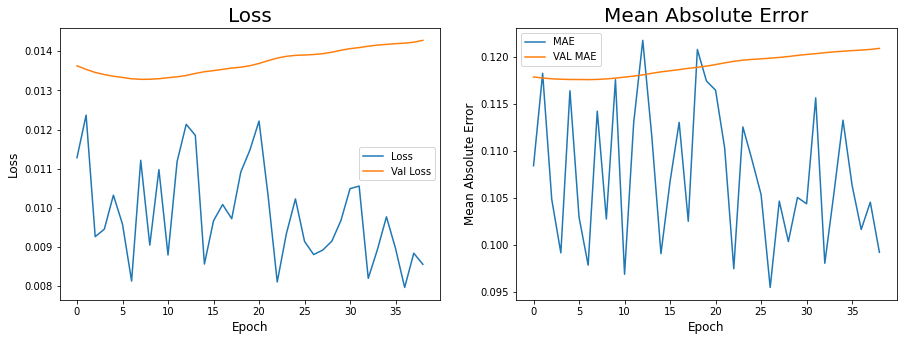

In [45]:
for i in datasets:
  print(i,"- Loss & MAE")
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
  ax1.plot(history[i].history['loss'])
  ax1.plot(history[i].history['val_loss'])
  ax1.legend(['Loss','Val Loss'])
  ax1.set_xlabel('Epoch', fontsize=12)
  ax1.set_ylabel('Loss', fontsize=12)
  ax1.set_title('Loss', fontsize=20)

  ax2.plot(history[i].history['mae'])
  ax2.plot(history[i].history['val_mae'])
  ax2.legend(['MAE','VAL MAE'])
  ax2.set_xlabel('Epoch', fontsize=12)
  ax2.set_ylabel('Mean Absolute Error', fontsize=12)
  ax2.set_title('Mean Absolute Error', fontsize=20)
  plt.show()

In [390]:
from datetime import datetime 
win = 2
out = []
def forecast(day, x):
  data_inf = data[x]['close'].copy()
  for j in range(day):
    X = np.array(data_inf[-2:])
    X = X.reshape(X.shape[0],1)  
    X_scaled = scaler[x].transform(X)
    X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, 1))
    new_idx = datetime(data_inf.index.year[-1], data_inf.index.month[-1], data_inf.index.day[-1]+1)
    xvalue = scaler[x].inverse_transform(model.predict(X_scaled))
    data_inf[new_idx] = np.round(xvalue[1][0])
  return data_inf

In [393]:
predictors = {}
npred = {}
for i, val in enumerate(datasets):
  npred = {}
  print(i,"-",val)
  npred = forecast(2, val)
  print(npred[-3:])
  

0 - ECII
1/1 [==============================] - 0s 18ms/step
timestamp
2022-12-09    484.0
2022-12-10    489.0
2022-12-11    493.0
Name: close, dtype: float64
1 - BMRI
1/1 [==============================] - 0s 20ms/step
timestamp
2022-12-09    9925.0
2022-12-10    9919.0
2022-12-11    9914.0
Name: close, dtype: float64
2 - MAPI
1/1 [==============================] - 0s 20ms/step
timestamp
2022-12-09    1425.0
2022-12-10    1422.0
2022-12-11    1419.0
Name: close, dtype: float64
3 - BBTN
1/1 [==============================] - 0s 20ms/step
timestamp
2022-12-09    1360.0
2022-12-10    1419.0
2022-12-11    1446.0
Name: close, dtype: float64
4 - CSMI
1/1 [==============================] - 0s 21ms/step
timestamp
2022-12-09    3150.0
2022-12-10    3150.0
2022-12-11    3150.0
Name: close, dtype: float64
5 - PNBN
1/1 [==============================] - 0s 19ms/step
timestamp
2022-12-09    1750.0
2022-12-10    1969.0
2022-12-11    2088.0
Name: close, dtype: float64
6 - SCCO
1/1 [=================